In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Importing train data
data = pd.read_csv("data.csv")
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
0,10.69,86.10,8920.16,19912.85,30.42,31.72,1.18,145.41,2.236,1.786,...,0.01,0.01,0.01,0.13,0.00,0.00,0.00,0.00,0.00,0
1,28.50,65.19,6564.00,6716.67,32.50,23.40,2.74,91.11,1.000,1.000,...,0.06,0.01,0.00,0.09,285.80,0.00,16.44,1.98,42.26,0
2,24.87,73.79,4285.47,6463.75,40.50,51.53,2.84,93.90,2.400,1.400,...,0.08,0.02,0.02,0.44,494.62,135.41,127.45,46.00,14.92,0
3,13.64,85.82,6887.56,9244.44,49.56,53.44,0.36,171.45,1.875,2.167,...,0.03,0.01,0.00,0.05,1015.19,0.00,210.63,92.58,0.00,0
4,4.50,95.92,8746.50,19987.50,32.75,37.88,0.92,153.25,2.000,1.500,...,0.01,0.00,0.00,0.04,0.00,106.41,79.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93995,8.18,92.55,4305.29,5420.00,30.60,34.43,0.73,76.67,0.000,0.000,...,0.20,0.04,0.04,0.04,0.00,0.00,0.00,0.00,0.00,1
93996,13.22,84.14,7614.67,14460.69,32.74,34.75,1.85,117.22,2.287,1.852,...,0.07,0.01,0.01,0.28,221.97,0.00,9.93,15.87,63.74,1
93997,14.91,85.36,4628.71,6070.00,31.30,39.43,2.09,135.70,3.000,2.000,...,0.44,0.06,0.04,0.23,468.81,265.85,44.89,12.76,52.39,1
93998,10.77,85.94,8540.43,19452.79,29.92,30.77,1.24,147.39,2.013,1.392,...,0.13,0.01,0.02,0.10,83.90,1034.35,281.25,53.10,0.00,1


## Data cleaning

In [3]:
# Here i am using .info() function to find out the dtypes of the all the features 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94000 entries, 0 to 93999
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A1       94000 non-null  float64
 1   A2       94000 non-null  float64
 2   A3       94000 non-null  float64
 3   A4       94000 non-null  float64
 4   A5       94000 non-null  float64
 5   A6       94000 non-null  float64
 6   A7       94000 non-null  float64
 7   A8       94000 non-null  float64
 8   A9       94000 non-null  float64
 9   A10      94000 non-null  float64
 10  A11      94000 non-null  float64
 11  A12      94000 non-null  float64
 12  A13      94000 non-null  float64
 13  A14      94000 non-null  float64
 14  A15      94000 non-null  float64
 15  A16      94000 non-null  float64
 16  A17      94000 non-null  float64
 17  A18      94000 non-null  float64
 18  A19      94000 non-null  float64
 19  A20      94000 non-null  float64
 20  A21      94000 non-null  int64  
 21  A22      940

It appers all the dtypes of the features are correct no need for type conversion

In [4]:
# Finding null values in the dataset 
data.isnull().sum().sum()

0

In [5]:
# Finding missing values in the dataset
data.isna().sum().sum()

0

In [6]:
# Finding duplicate values in the dataset
data.duplicated().sum().sum()

1

In [7]:
# Found 1 duplicate value dropping it 
data.drop_duplicates(inplace = True)

## Exploratory Data Analysis

In [8]:
#Characteristics of dataset
data.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
count,93999.000000,93999.000000,93999.000000,93999.000000,93999.000000,93999.000000,93999.000000,93999.000000,93999.000000,93999.000000,...,93999.000000,93999.000000,93999.000000,93999.000000,93999.000000,93999.000000,93999.000000,93999.000000,93999.00000,93999.000000
mean,12.134261,83.838265,7319.587022,13449.516493,33.507755,36.983428,1.518244,124.108985,1.697825,1.407075,...,0.074435,0.008550,0.013537,0.133532,290.759627,357.980252,103.483669,28.847322,38.51032,0.042554
std,6.587875,8.672839,2652.533160,8197.494990,11.906876,14.209336,1.007397,33.130441,0.776813,0.652141,...,0.138357,0.020052,0.029078,0.156658,471.960328,597.596185,136.248402,62.759325,90.88336,0.201850
min,0.000000,20.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.010000,-0.020000,-0.020000,0.000000,-751.260000,-405.370000,-616.230000,-490.160000,-719.72000,0.000000
25%,7.670000,79.000000,5618.605000,8700.000000,26.880000,28.780000,0.820000,103.025000,1.272000,1.000000,...,0.010000,0.000000,0.000000,0.060000,0.000000,0.000000,14.970000,0.000000,0.00000,0.000000
50%,12.020000,84.360000,7285.590000,11862.560000,32.770000,35.940000,1.420000,127.240000,1.667000,1.399000,...,0.030000,0.000000,0.010000,0.090000,115.140000,102.270000,59.350000,10.500000,0.00000,0.000000
75%,16.080000,89.670000,8780.820000,15896.790000,39.100000,43.830000,2.020000,143.100000,2.064000,1.714000,...,0.080000,0.010000,0.010000,0.140000,380.145000,485.880000,140.955000,34.860000,49.86500,0.000000
max,62.710000,100.000000,26333.500000,170300.000000,146.000000,146.000000,18.670000,524.000000,44.000000,44.000000,...,5.300000,0.700000,1.690000,4.080000,15288.660000,19503.760000,3265.980000,6561.930000,13487.00000,1.000000


               A1        A2        A3        A4        A5        A6        A7  \
A1       1.000000 -0.748950 -0.471050 -0.378875  0.492051  0.483079  0.526470   
A2      -0.748950  1.000000  0.517857  0.407803 -0.482513 -0.482481 -0.618719   
A3      -0.471050  0.517857  1.000000  0.665719 -0.515758 -0.568830 -0.445050   
A4      -0.378875  0.407803  0.665719  1.000000 -0.315094 -0.412738 -0.379972   
A5       0.492051 -0.482513 -0.515758 -0.315094  1.000000  0.903870  0.391869   
A6       0.483079 -0.482481 -0.568830 -0.412738  0.903870  1.000000  0.401515   
A7       0.526470 -0.618719 -0.445050 -0.379972  0.391869  0.401515  1.000000   
A8      -0.373440  0.375253  0.547361  0.369469 -0.434262 -0.451379 -0.298286   
A9      -0.331234  0.410540  0.526467  0.493178 -0.294313 -0.335916 -0.344286   
A10     -0.295327  0.380495  0.487400  0.390337 -0.285119 -0.307063 -0.308983   
A11     -0.484333  0.770948  0.419545  0.318124 -0.372816 -0.370362 -0.481255   
A12     -0.372814  0.381775 

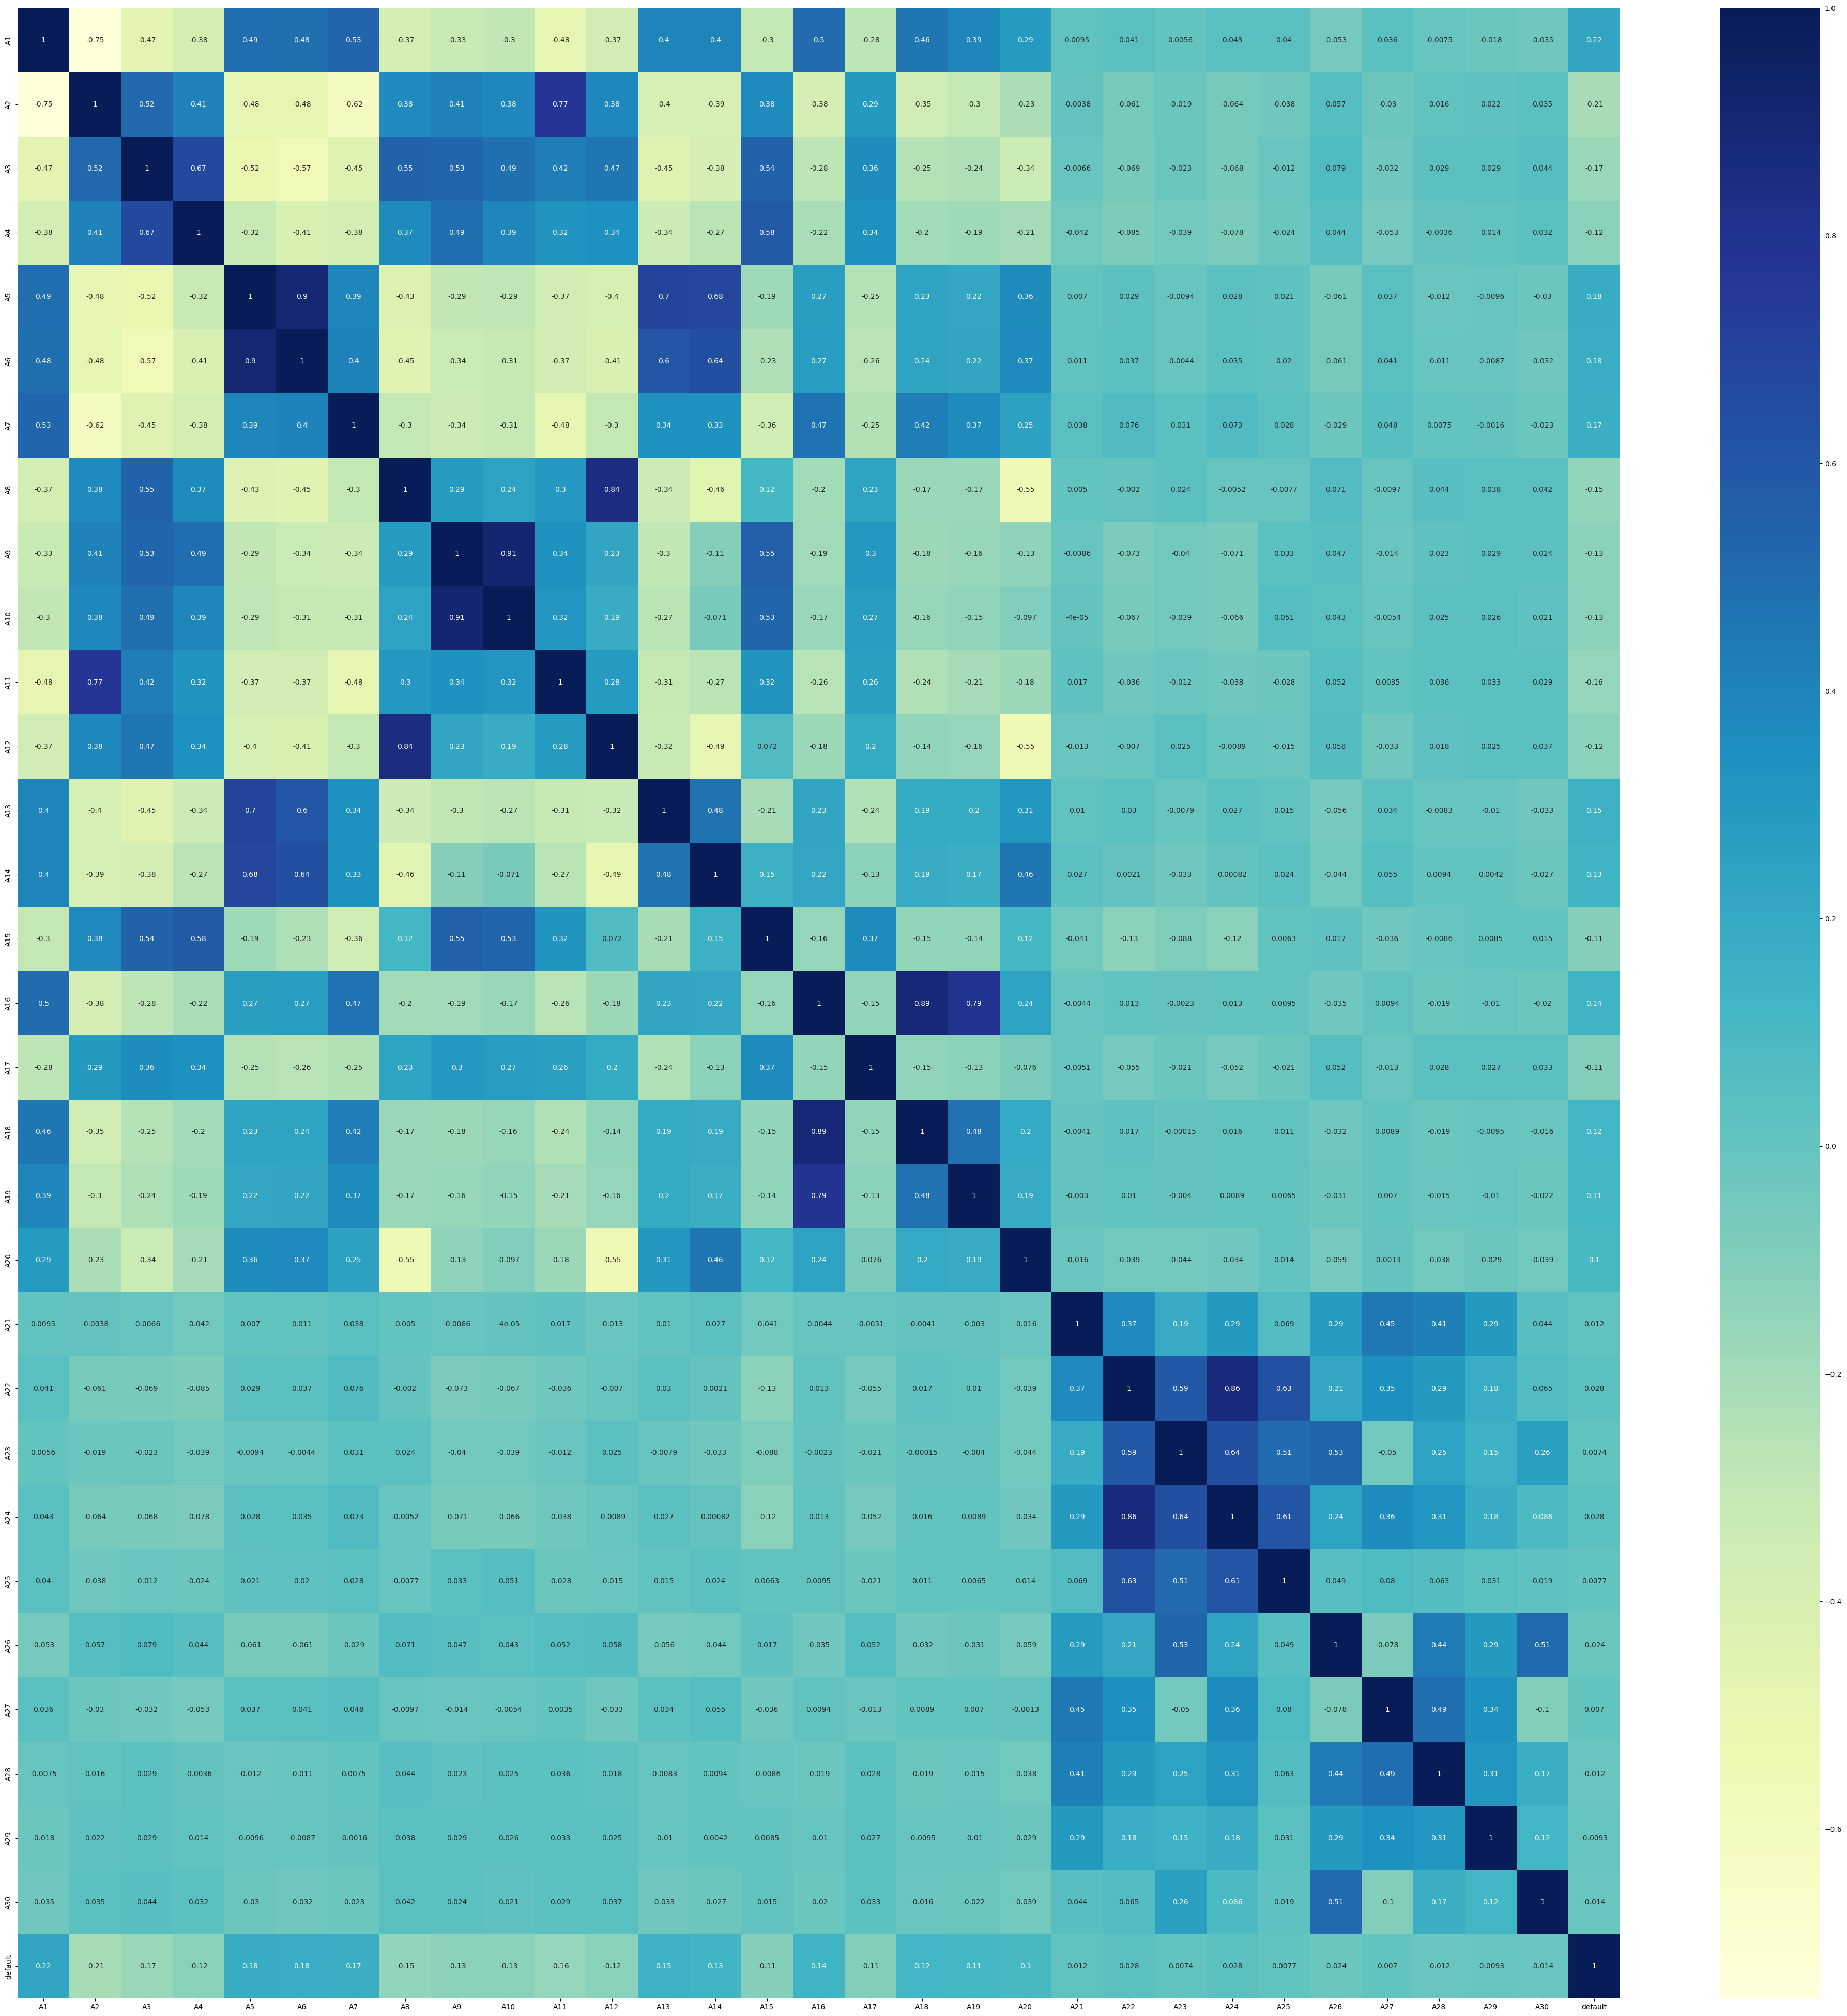

In [9]:
# Creating correlation matrix and heatmap based on the matrix
print(data.corr())
plt.figure(figsize=(50, 50))
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)

plt.show()

From the above corr matrix feature A22 and A24, A6 and A5, A10 and A9, A12 and A8 are highly correlated, by eliminates those features can result in better performing model, but in our case it didn't change much auc score so we will move-on without eliminating it.

In [10]:
# Finding out unique values in each feature and their count
for i in data.columns:
    print(i)
    print(data[i].value_counts())
    print("___________________________________")

A1
0.00     2326
10.00     354
12.50     307
5.00      271
15.00     233
         ... 
24.49       1
28.04       1
46.75       1
36.95       1
28.46       1
Name: A1, Length: 3381, dtype: int64
___________________________________
A2
100.00    812
86.00     198
87.00     186
88.00     183
90.00     179
         ... 
60.41       1
40.33       1
65.51       1
57.82       1
48.18       1
Name: A2, Length: 4541, dtype: int64
___________________________________
A3
0.00        51
8703.84     20
7658.92     18
7572.55     17
7243.69     16
            ..
4245.71      1
13100.11     1
4821.58      1
6477.80      1
3672.42      1
Name: A3, Length: 73162, dtype: int64
___________________________________
A4
7400.00     43
6500.00     38
10000.00    35
8000.00     34
8600.00     33
            ..
9789.47      1
13625.49     1
13638.46     1
9675.71      1
5800.87      1
Name: A4, Length: 59682, dtype: int64
___________________________________
A5
35.00     187
33.00     170
38.00     169
29.00     1

In [11]:
# Creating plot functions

#Histogram
def plots_hist(df, col):
    plt.figure(figsize=(7,5))
    sns.displot(df[col])
    
#boxplot    
def plots_box(df, col):
    plt.figure(figsize=(7,5))
    sns.boxplot(x = df[col])
    
# Probability Plot
def plot_prob(df, col):
    fig = plt.figure()
    ax2 = fig.add_subplot(212)
    stats.probplot(df[col], dist="norm", plot=ax2)

Here I am using histogram and probability plot to check the normality of all the features 

As from the graphs below all our features are highly skewed 

C:\Users\ketul\AppData\Local\Temp\ipykernel_11252\3085191047.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


<Figure size 700x500 with 0 Axes>

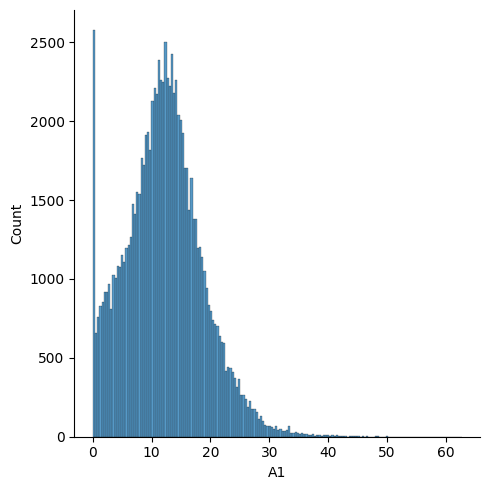

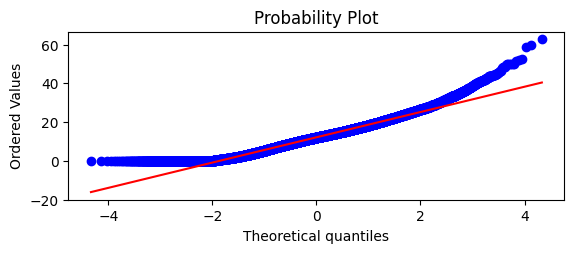

<Figure size 700x500 with 0 Axes>

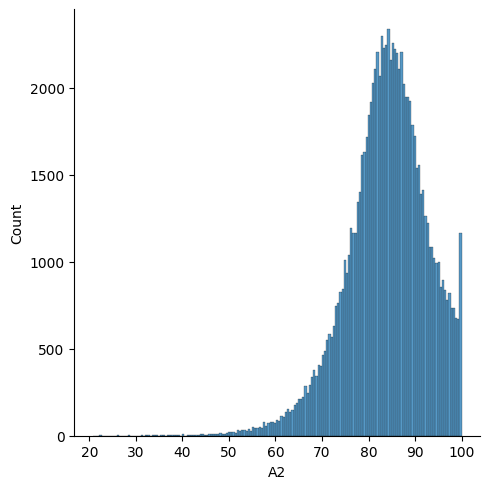

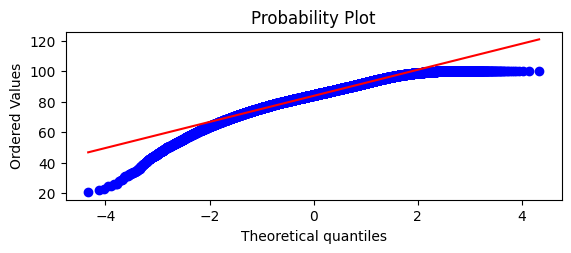

<Figure size 700x500 with 0 Axes>

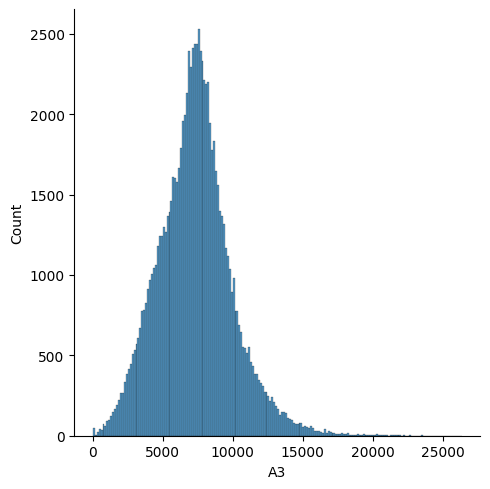

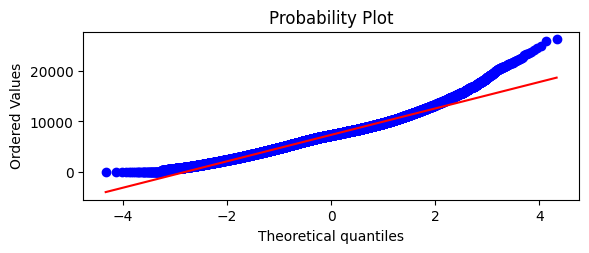

<Figure size 700x500 with 0 Axes>

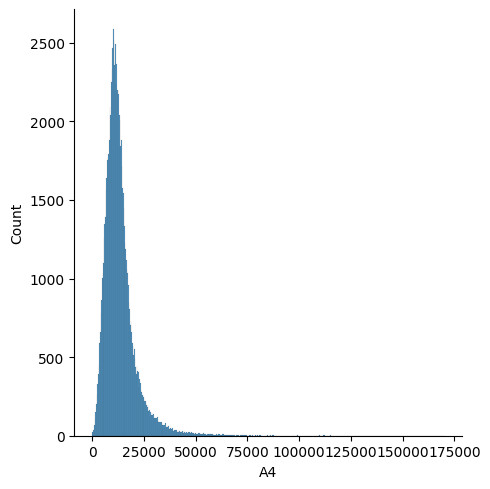

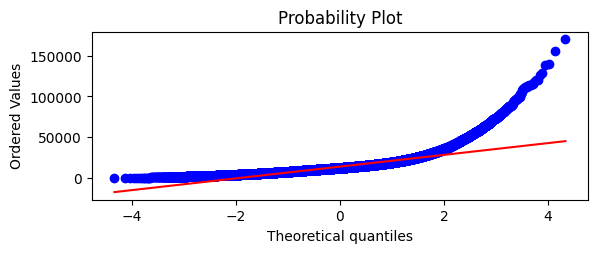

<Figure size 700x500 with 0 Axes>

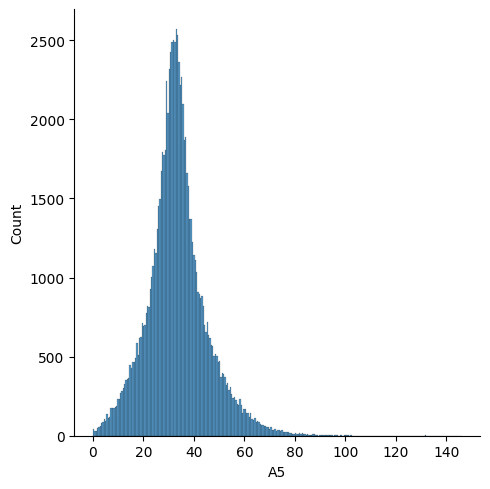

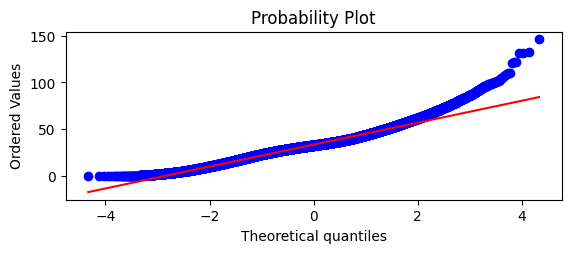

<Figure size 700x500 with 0 Axes>

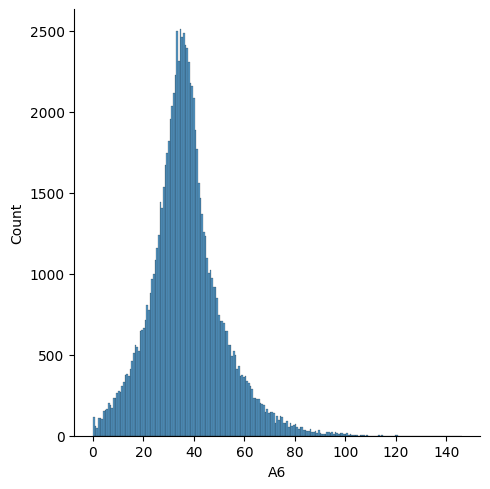

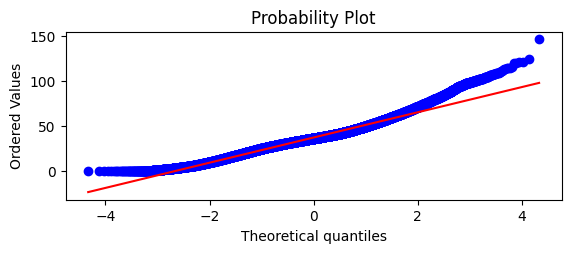

<Figure size 700x500 with 0 Axes>

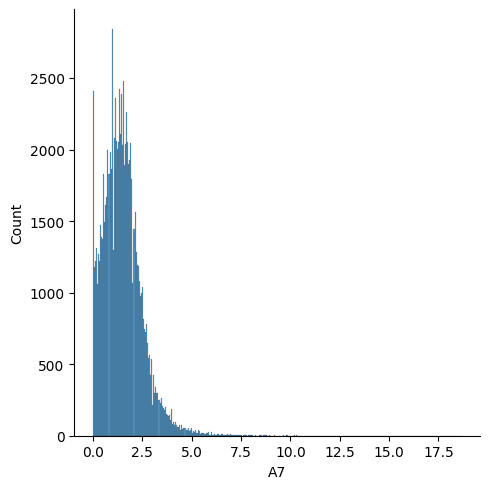

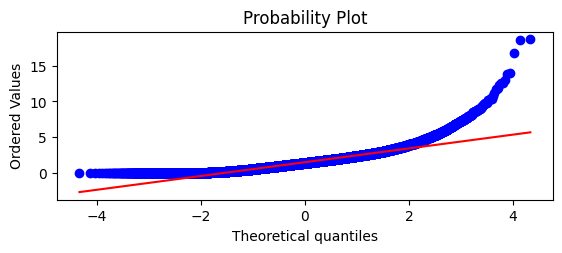

<Figure size 700x500 with 0 Axes>

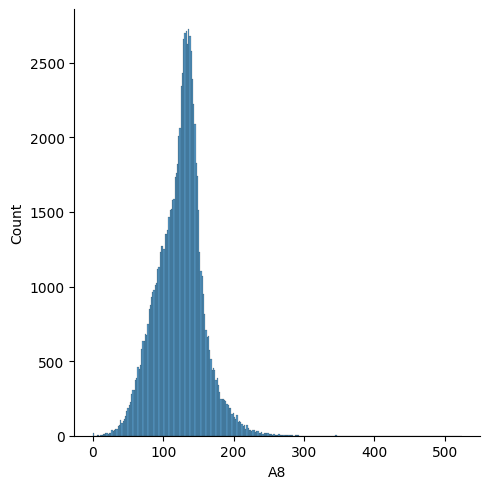

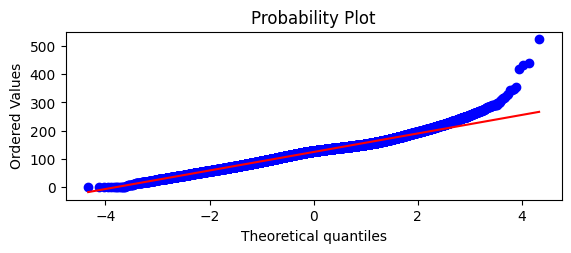

<Figure size 700x500 with 0 Axes>

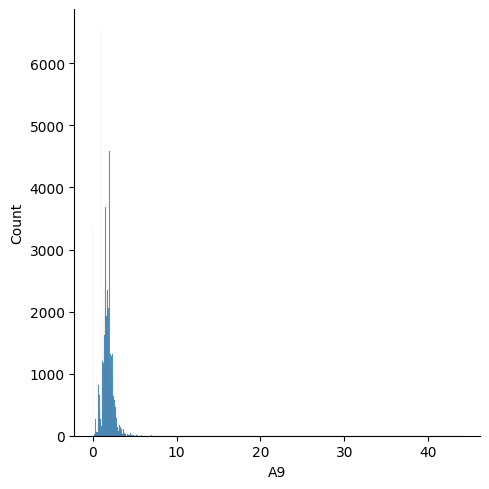

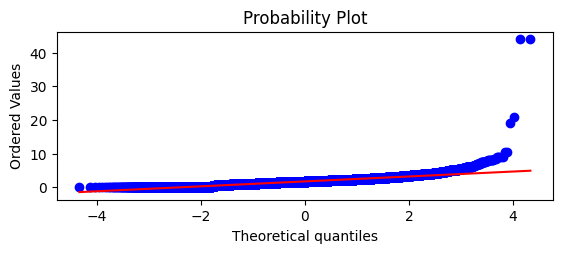

<Figure size 700x500 with 0 Axes>

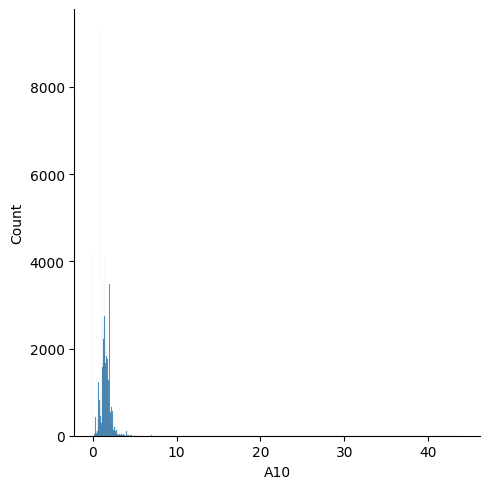

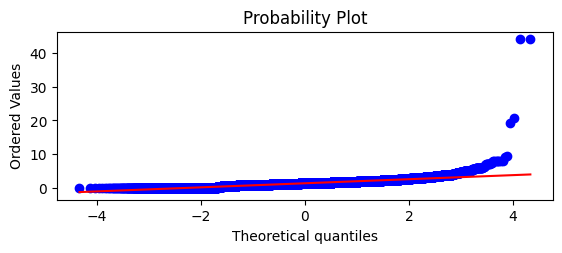

<Figure size 700x500 with 0 Axes>

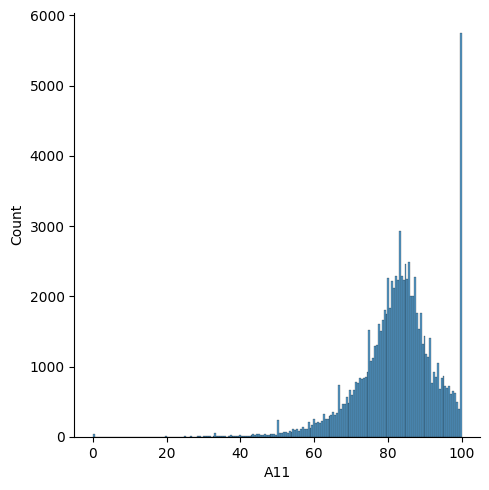

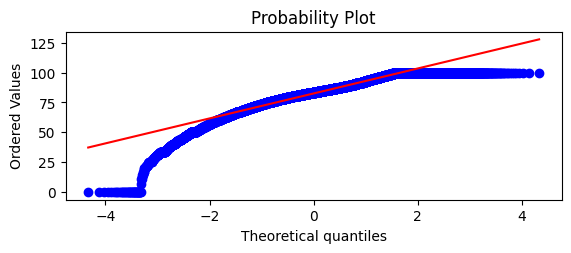

<Figure size 700x500 with 0 Axes>

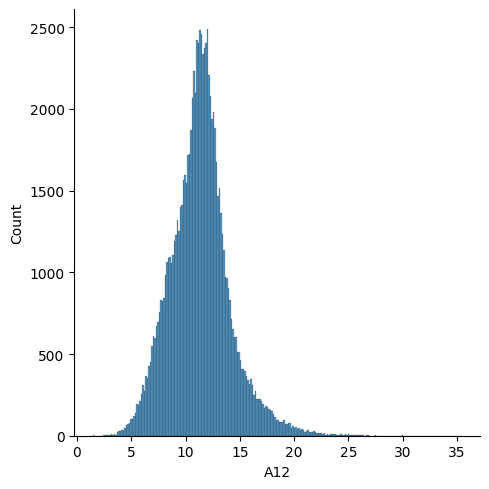

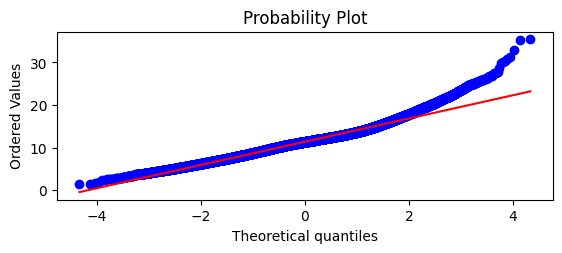

<Figure size 700x500 with 0 Axes>

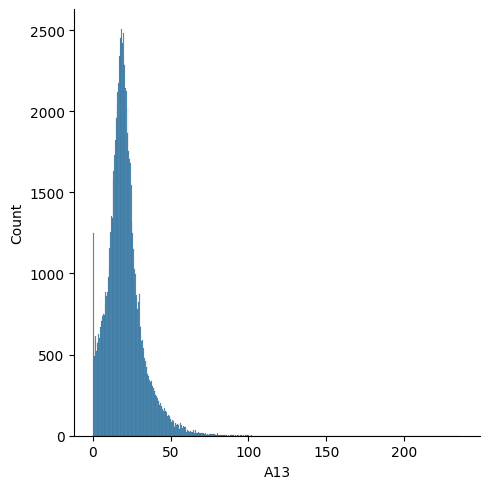

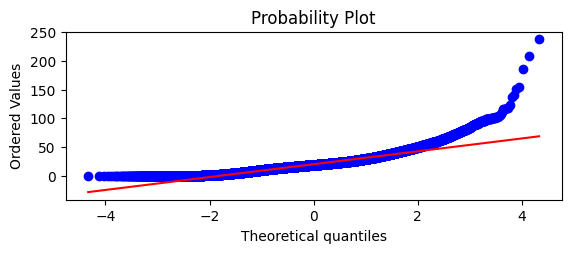

<Figure size 700x500 with 0 Axes>

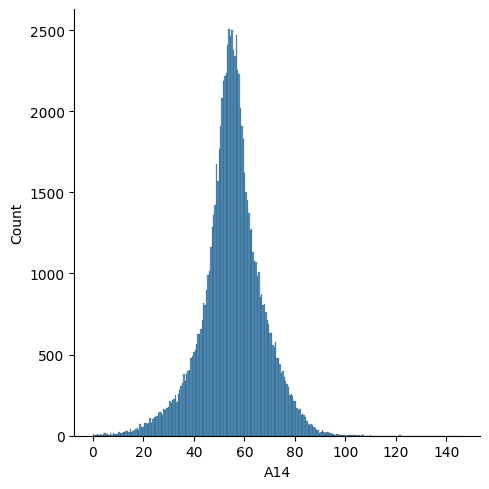

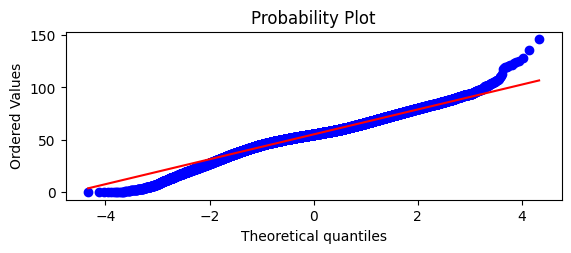

<Figure size 700x500 with 0 Axes>

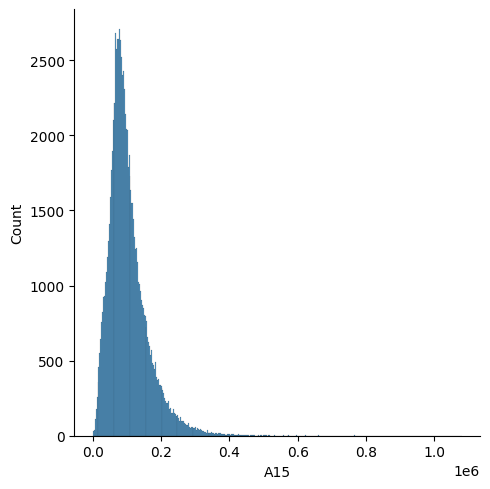

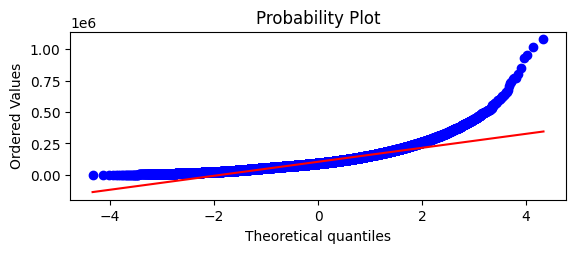

<Figure size 700x500 with 0 Axes>

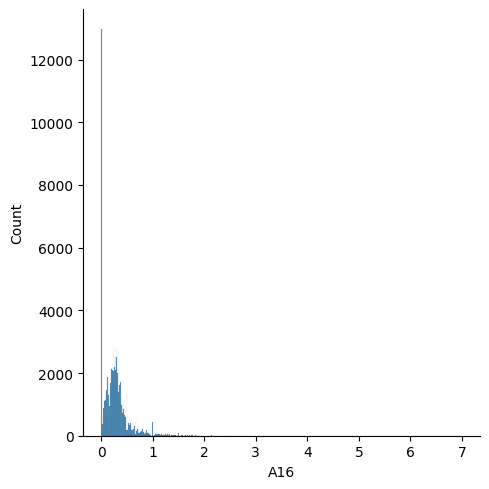

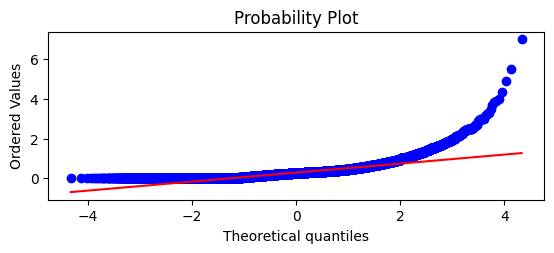

<Figure size 700x500 with 0 Axes>

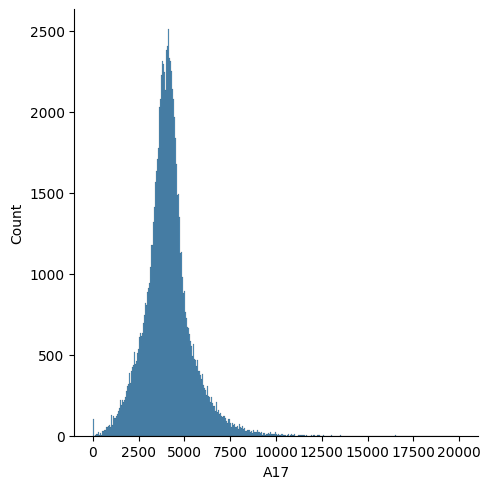

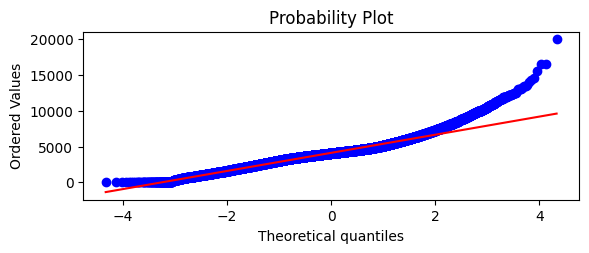

<Figure size 700x500 with 0 Axes>

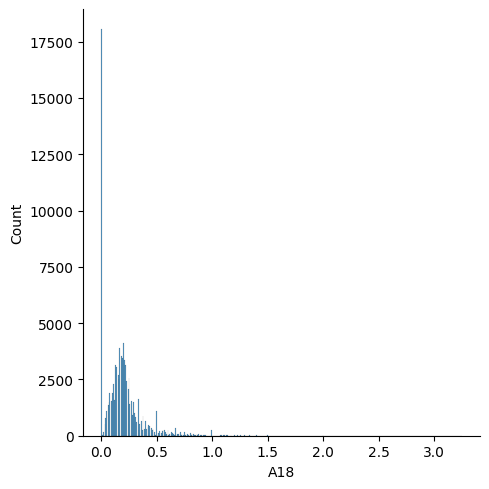

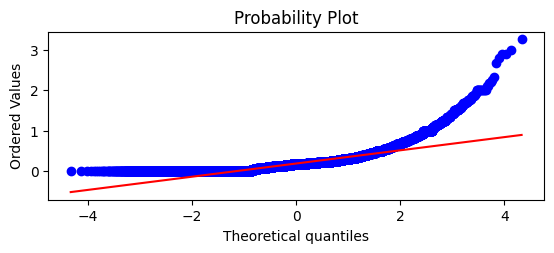

<Figure size 700x500 with 0 Axes>

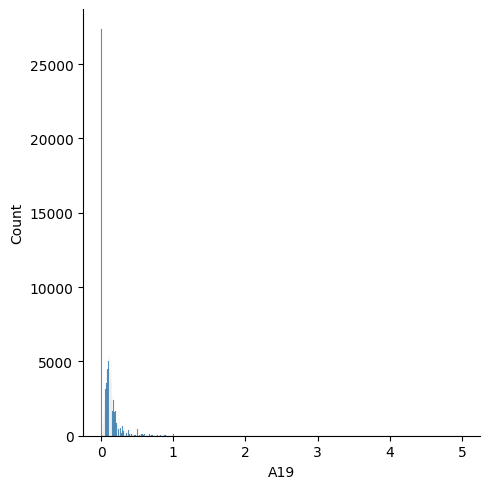

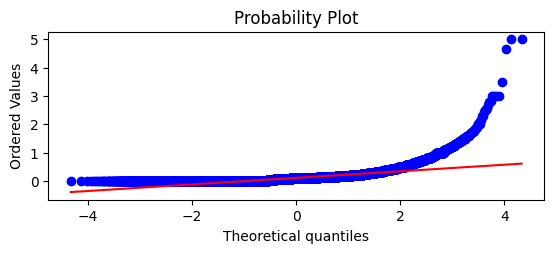

<Figure size 700x500 with 0 Axes>

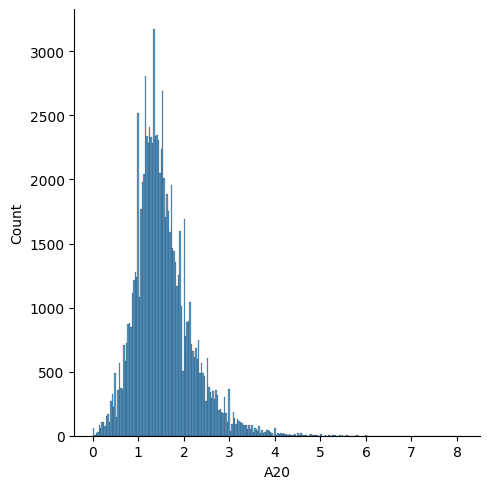

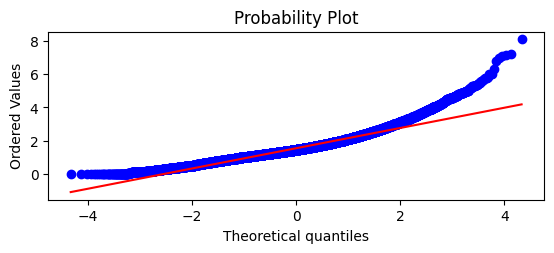

<Figure size 700x500 with 0 Axes>

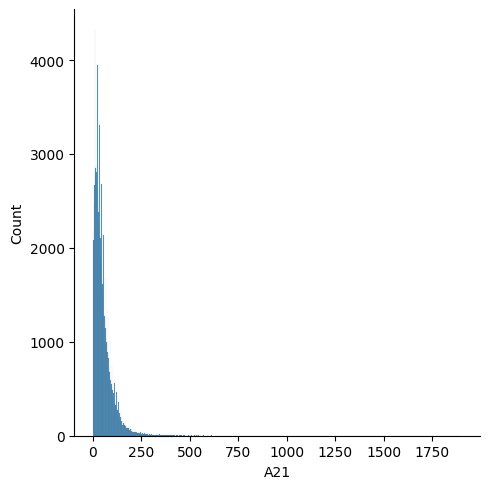

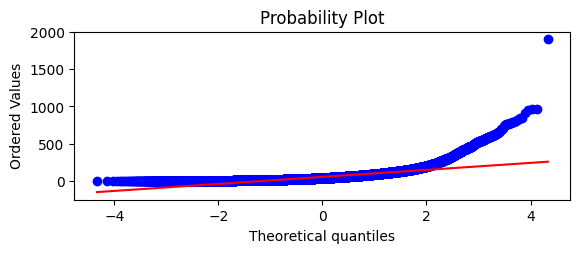

<Figure size 700x500 with 0 Axes>

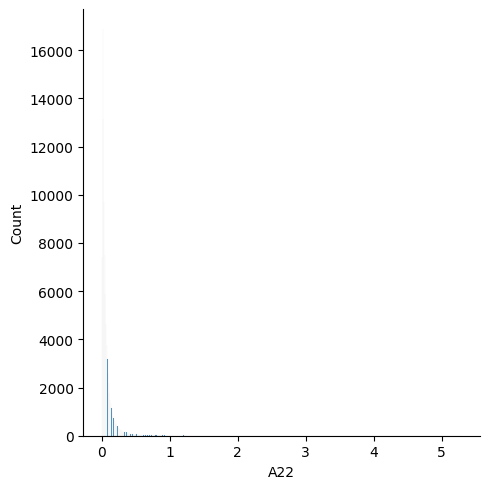

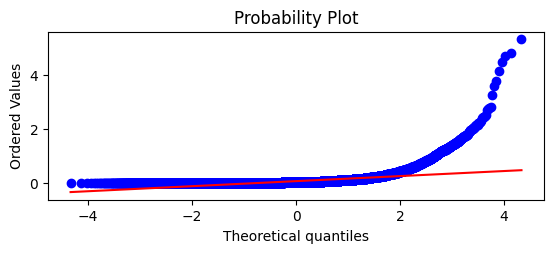

<Figure size 700x500 with 0 Axes>

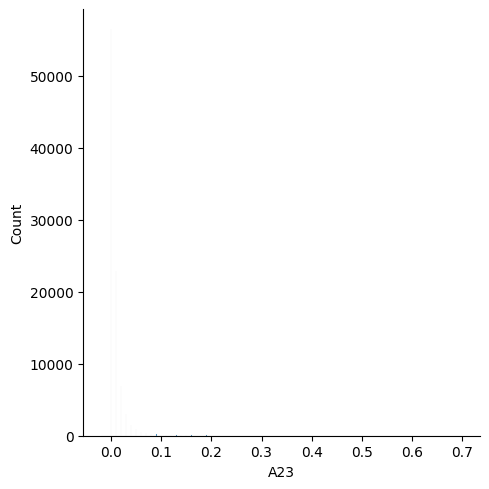

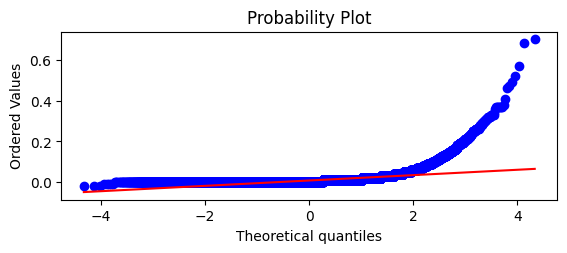

<Figure size 700x500 with 0 Axes>

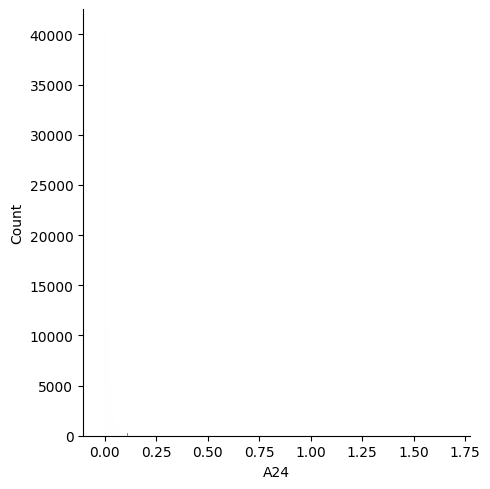

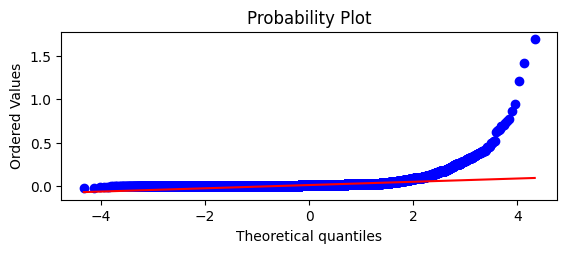

<Figure size 700x500 with 0 Axes>

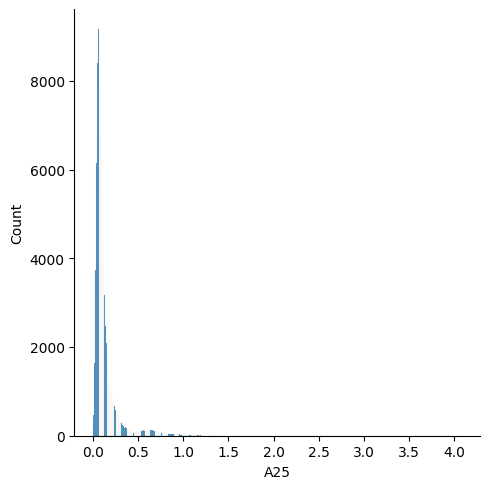

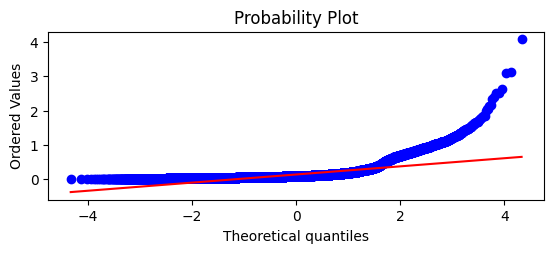

<Figure size 700x500 with 0 Axes>

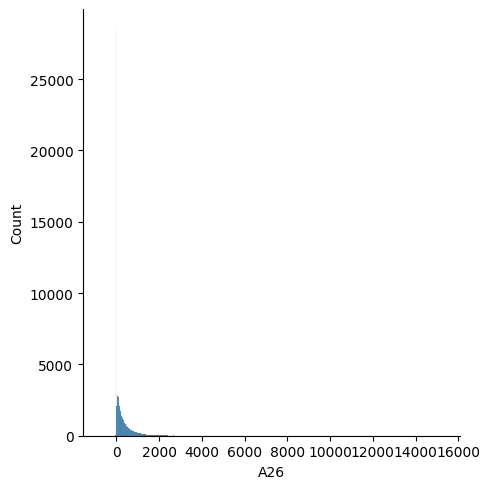

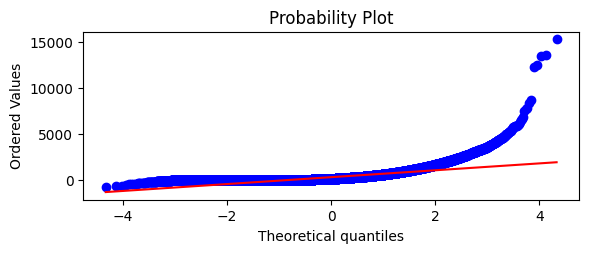

<Figure size 700x500 with 0 Axes>

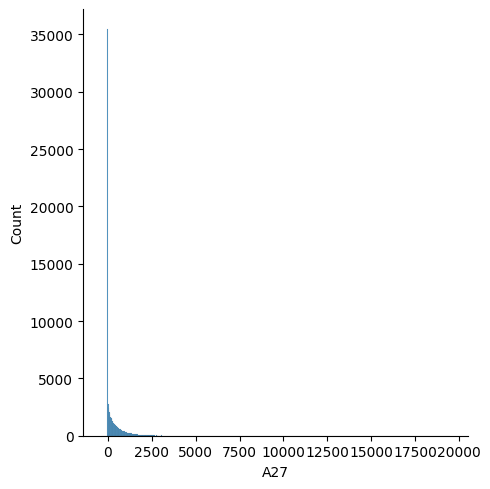

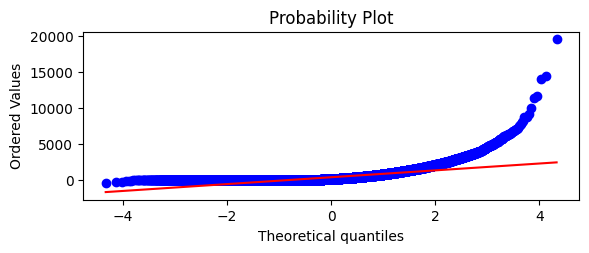

<Figure size 700x500 with 0 Axes>

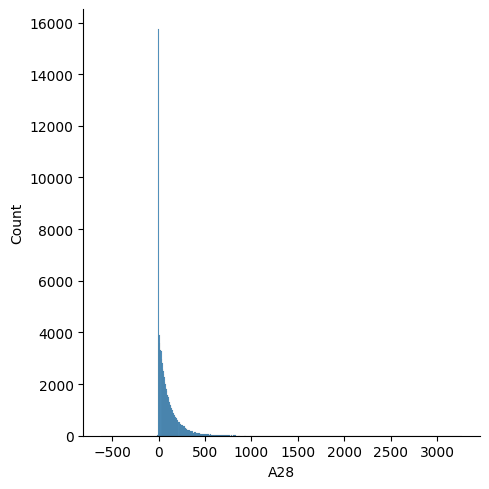

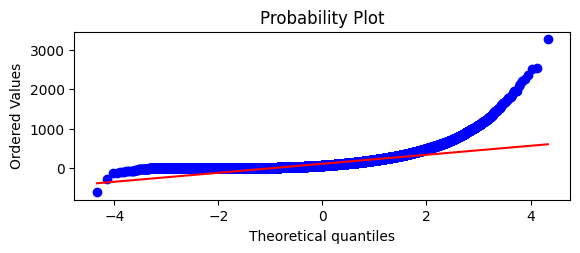

<Figure size 700x500 with 0 Axes>

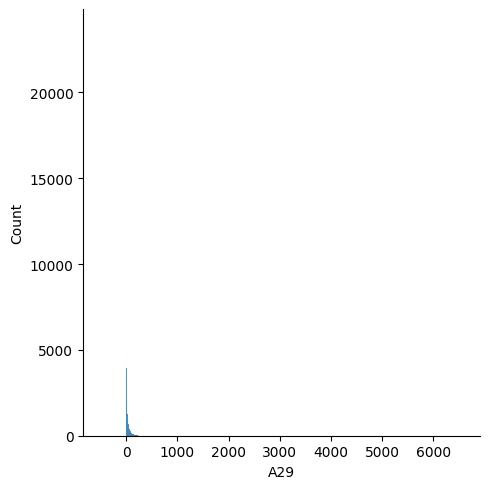

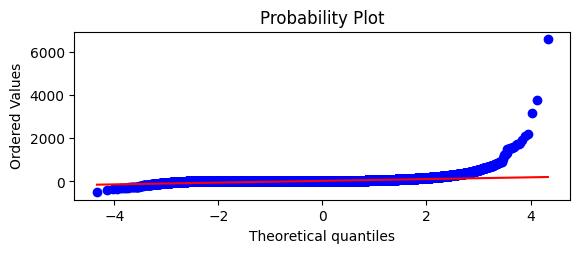

<Figure size 700x500 with 0 Axes>

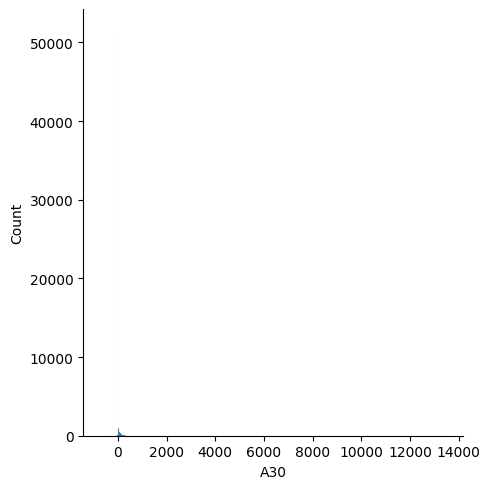

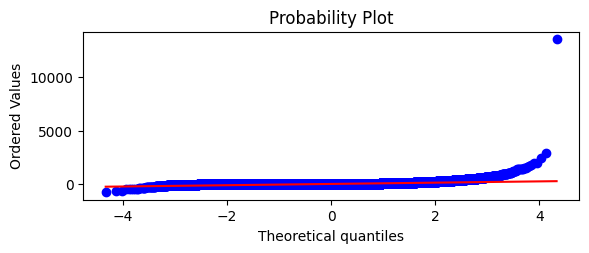

<Figure size 700x500 with 0 Axes>

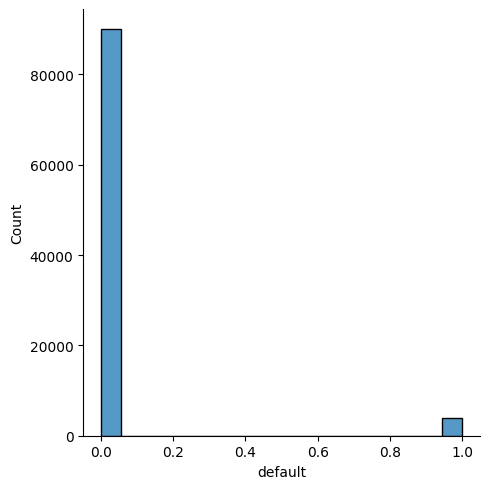

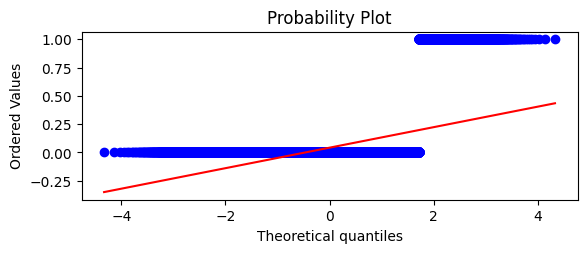

In [12]:
# Plotting histogram and Probability Plot for all features
for col in data.columns:
    plots_hist(data, col)
    plot_prob(data, col)

Here I am checking for outliers using boxplot

As from the graphs below most of features have lot of outliers 

C:\Users\ketul\AppData\Local\Temp\ipykernel_11252\3085191047.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(7,5))


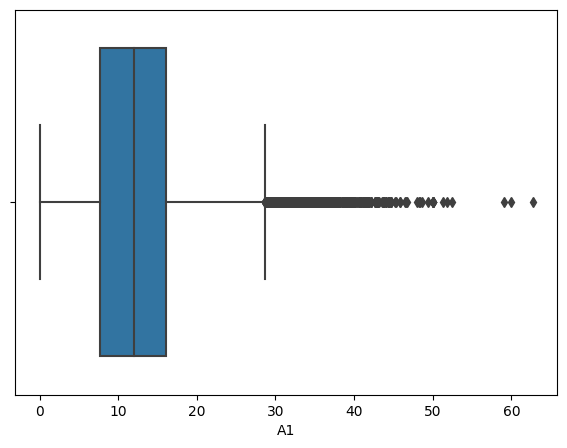

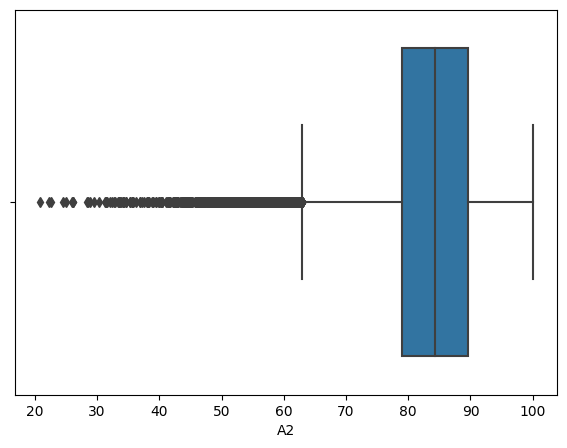

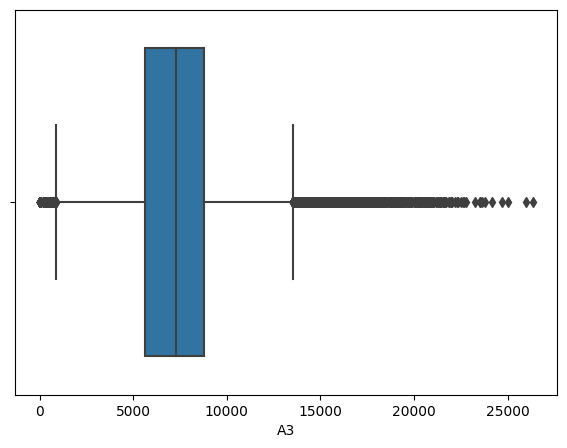

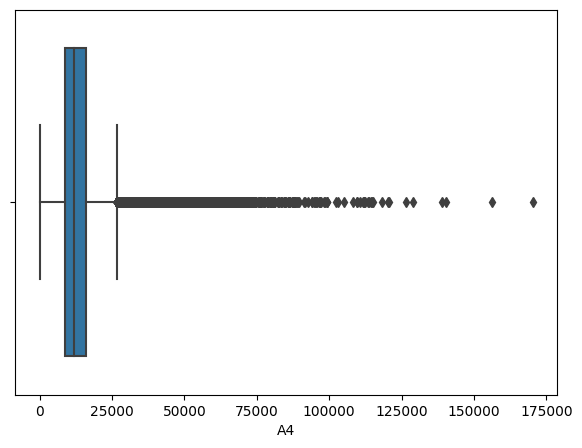

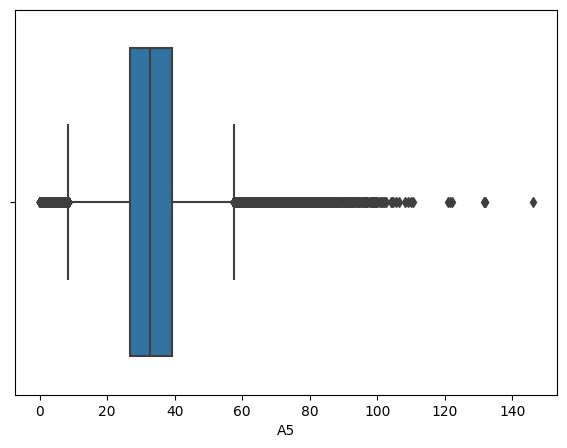

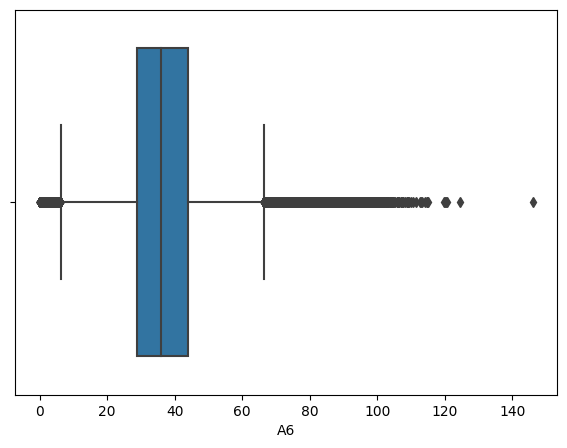

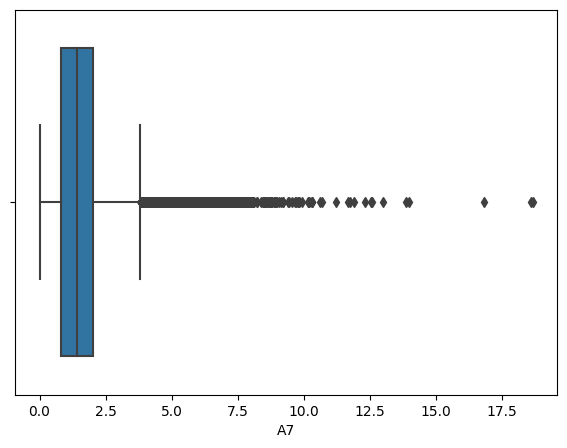

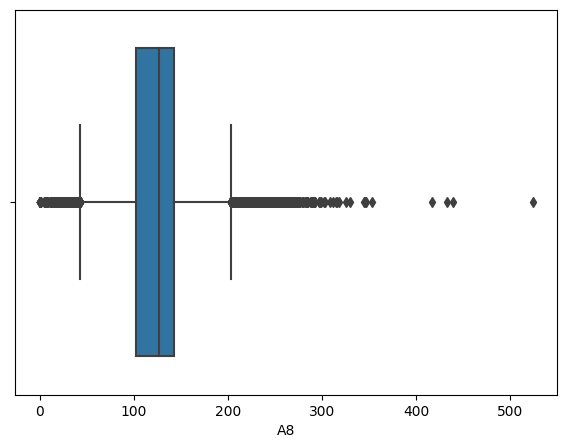

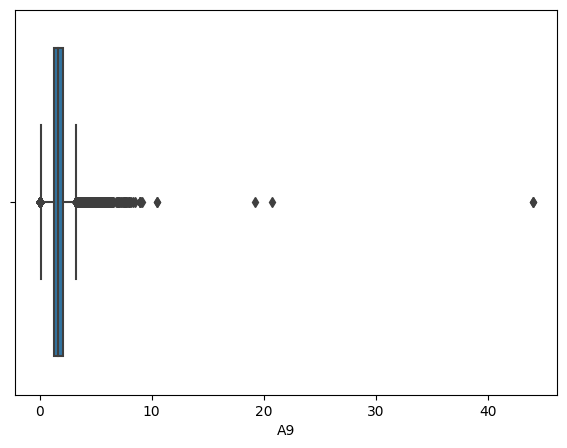

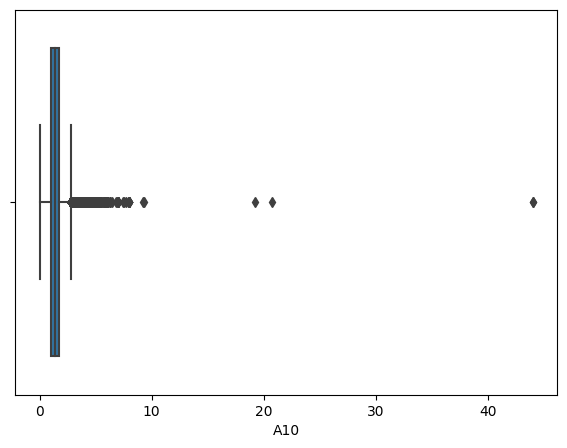

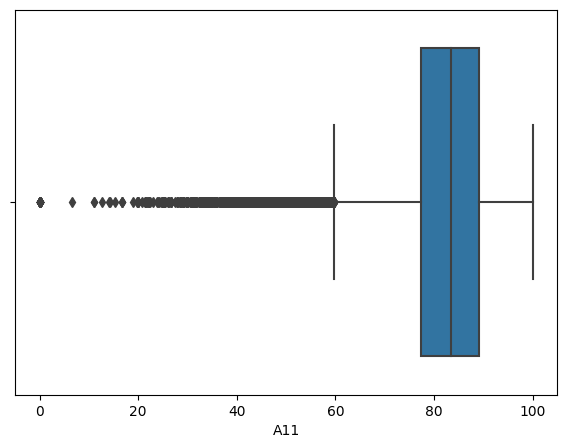

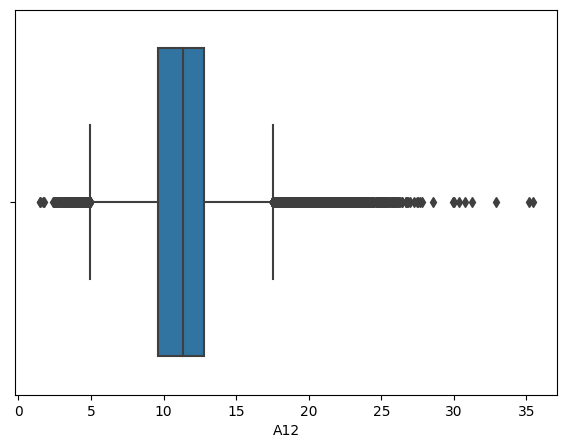

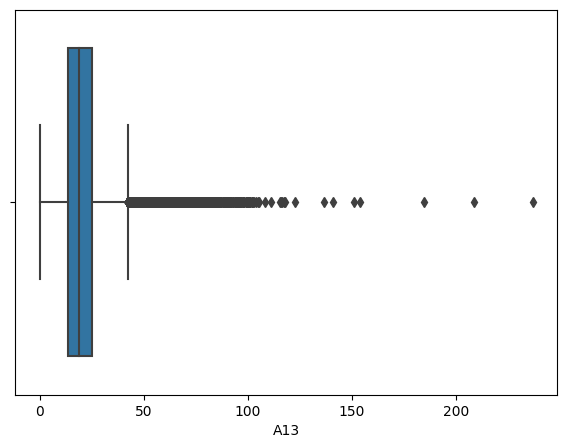

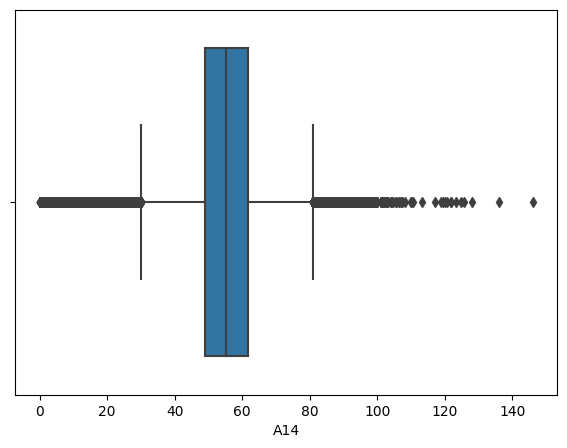

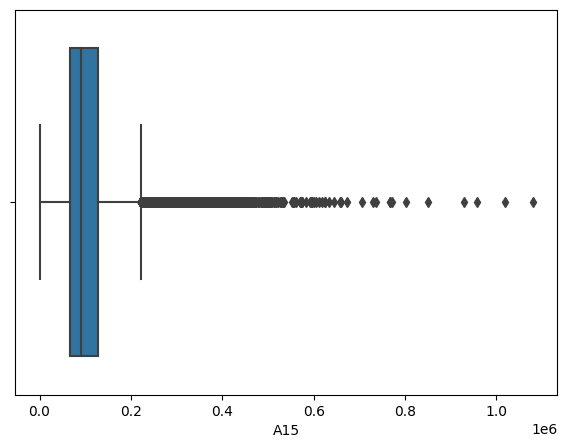

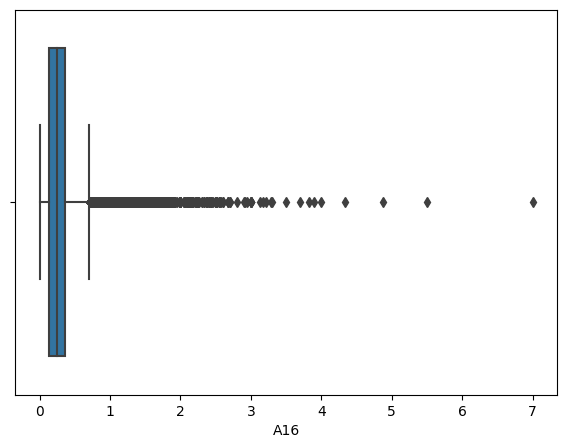

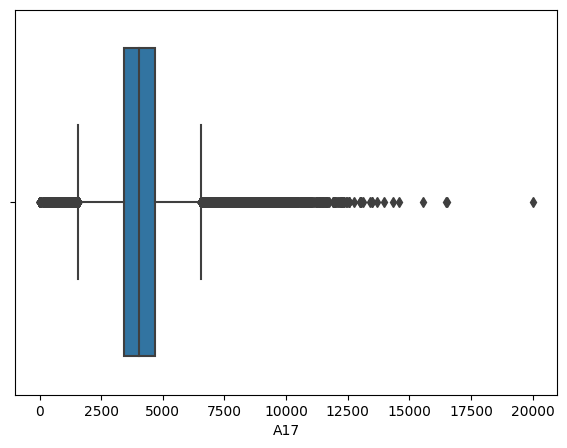

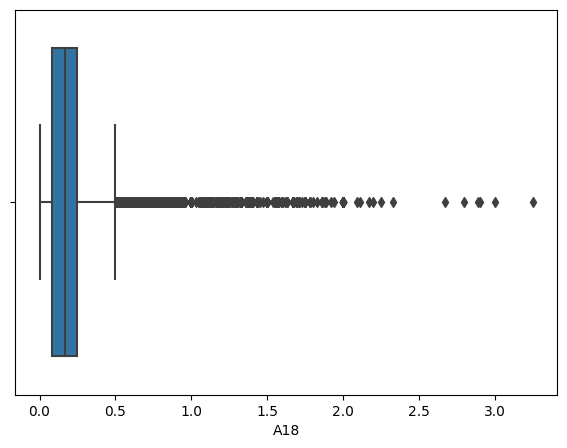

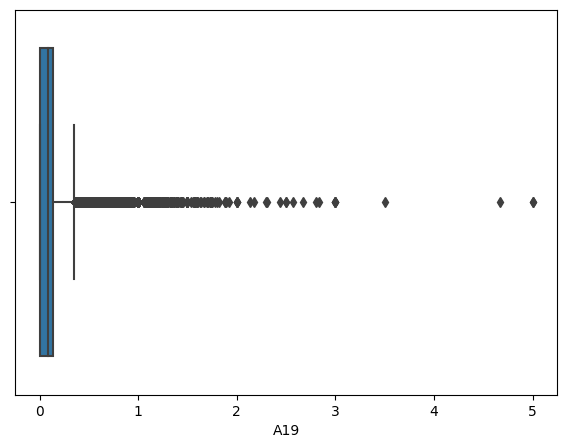

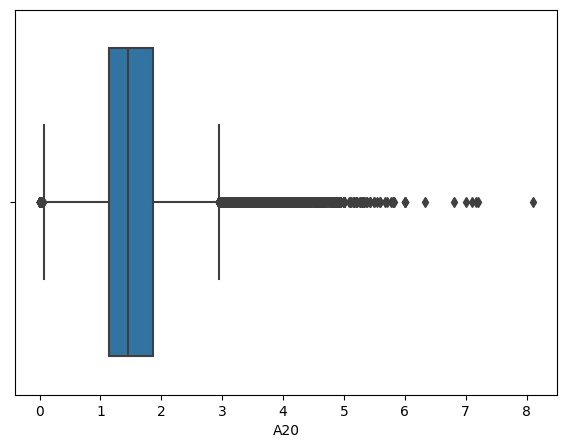

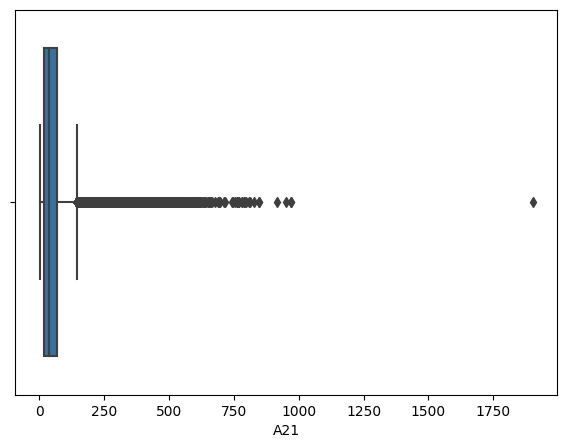

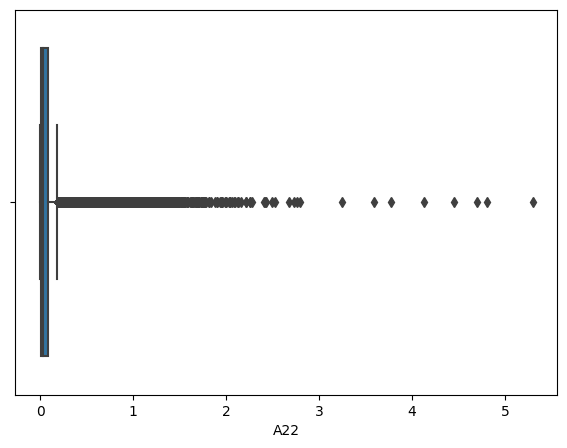

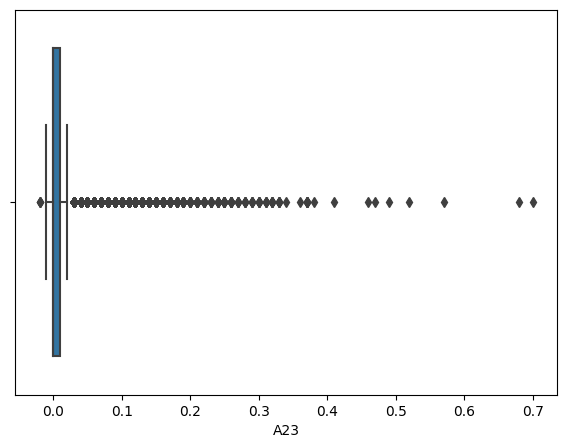

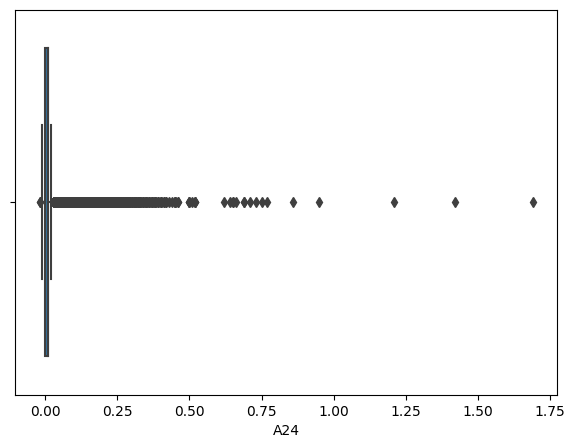

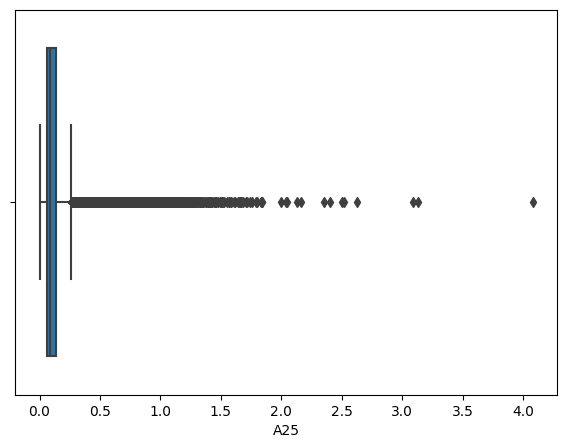

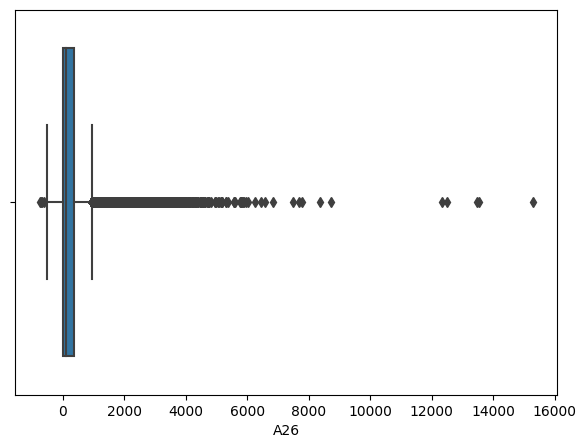

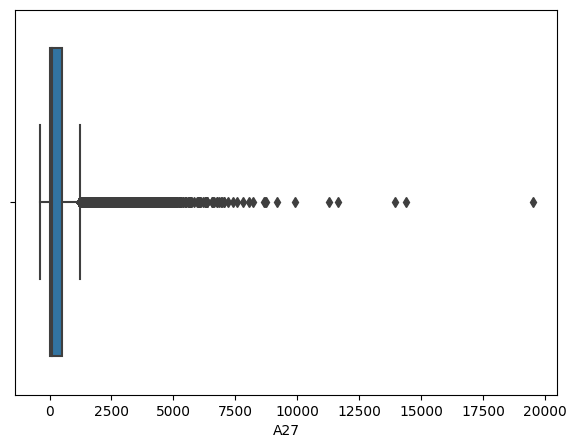

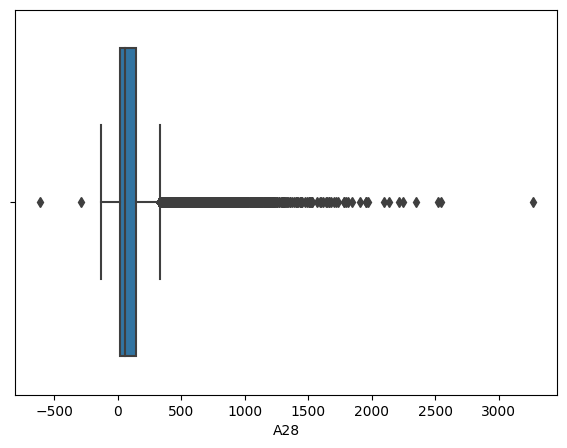

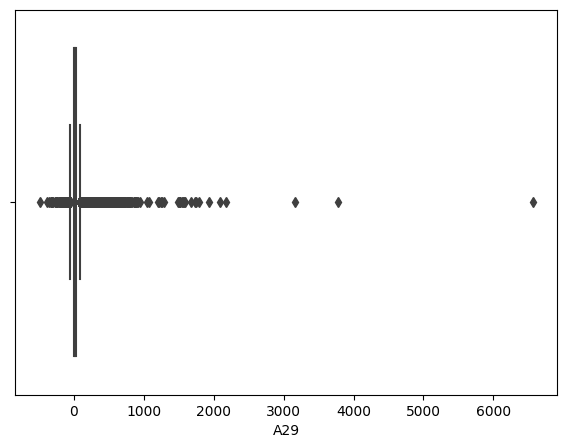

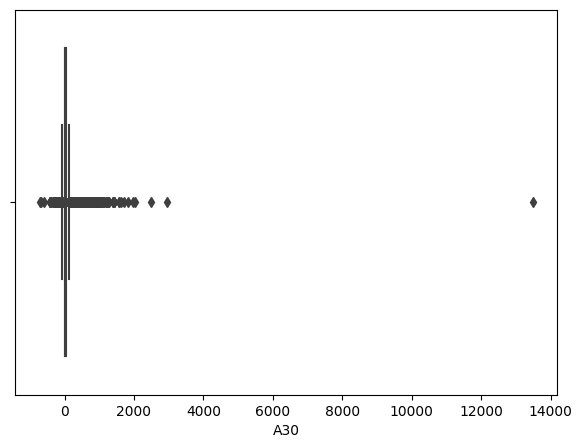

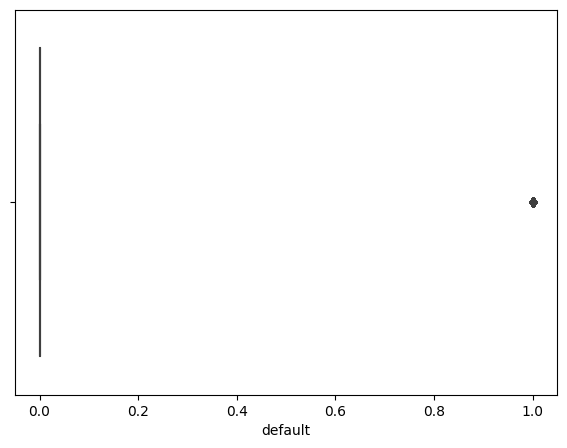

In [13]:
# Plotting Box plot for all the features 

for col in data.columns:
    plots_box(data, col)

In [14]:
# Assinging independent and dependent variables as X and y for the model

X = data.drop('default', axis = 1)
y = data['default']

In [15]:
print(X.shape)
print(y.shape)

(93999, 30)
(93999,)


Here I am scaling the data using MinMaxScaler (range 0 to 1) since most of the feature does not follow the same scale 

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Scaling the data using MinMaxScaler which scale the data from 0 to 1 

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [17]:
X.shape

(93999, 30)

In [18]:
data['default'].value_counts()

0    89999
1     4000
Name: default, dtype: int64

<AxesSubplot: xlabel='default', ylabel='Count'>

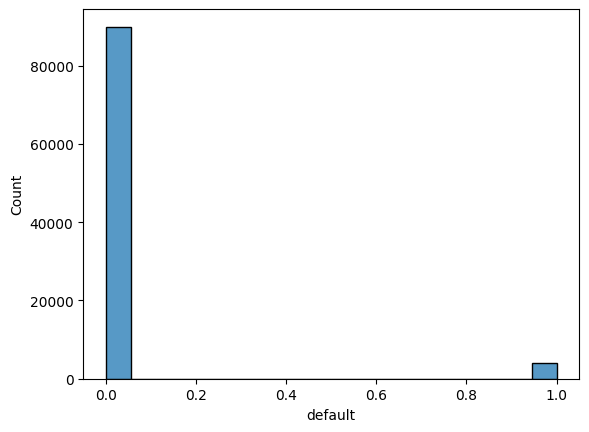

In [19]:
sns.histplot(data, x = data['default'])

The prediction features is highly imbalanced

### Yeo-Johnson Transformation

Since our feature are highly skewed and has lot of outliers with negative and zero values I am using Yeo-Johnson Transformation

In [20]:
from sklearn.preprocessing import PowerTransformer 

# Tranforming the data using Yeo-Johnson transformer
tranformer = PowerTransformer(method = 'yeo-johnson')
X = tranformer.fit_transform(X)
X = pd.DataFrame(X)

In [21]:
X.shape

(93999, 30)

As we can see from below graph after transformation using Yeo-Johnson we have reduced the number of outliers and our features
now less skewed than before

C:\Users\ketul\AppData\Local\Temp\ipykernel_11252\3085191047.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(7,5))


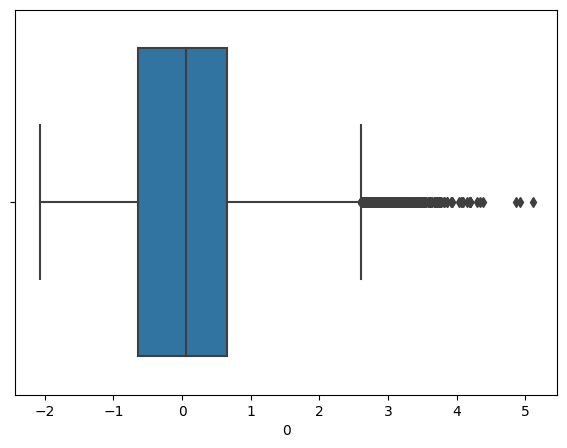

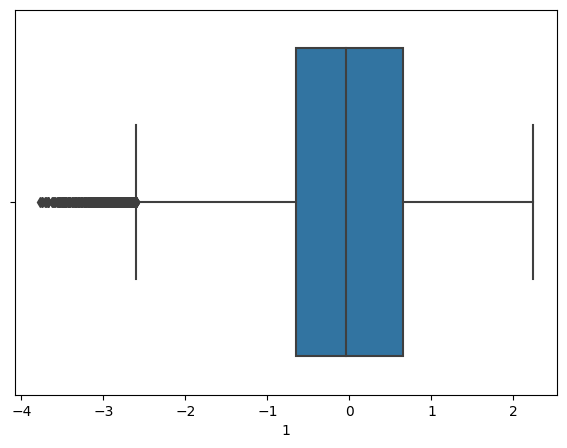

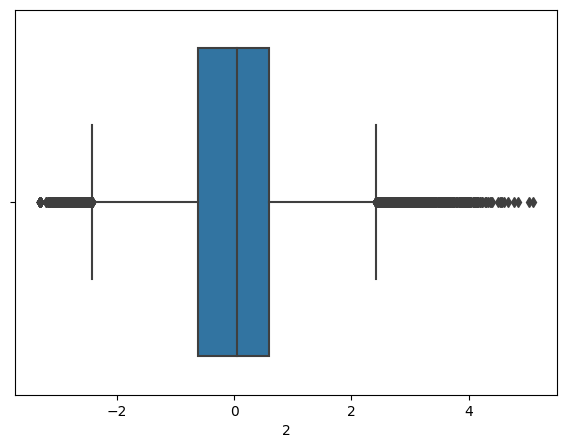

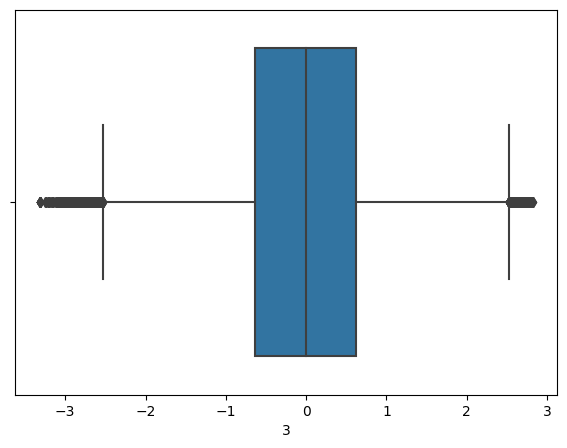

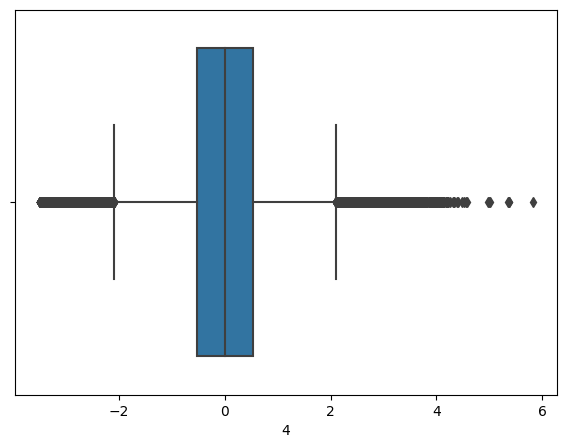

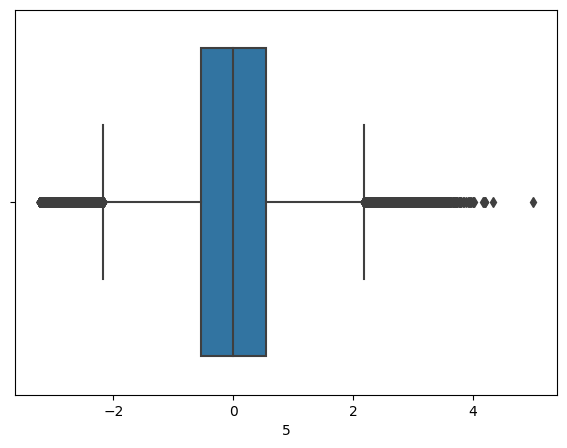

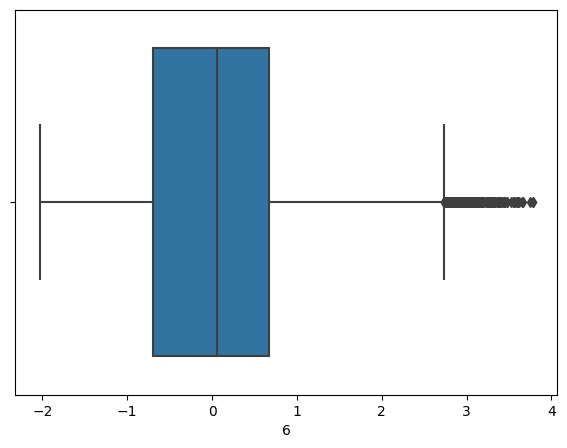

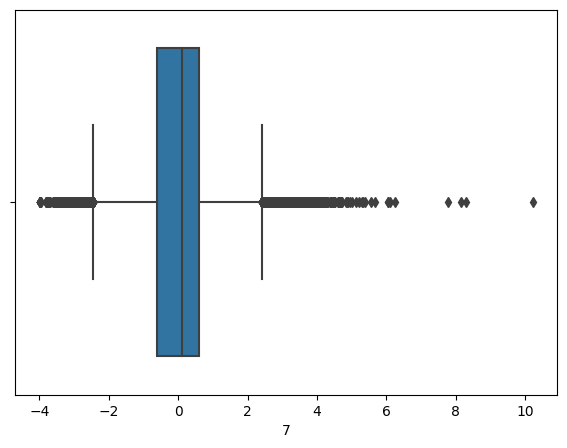

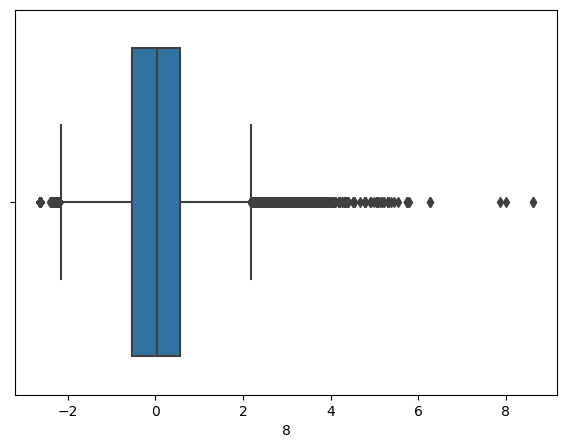

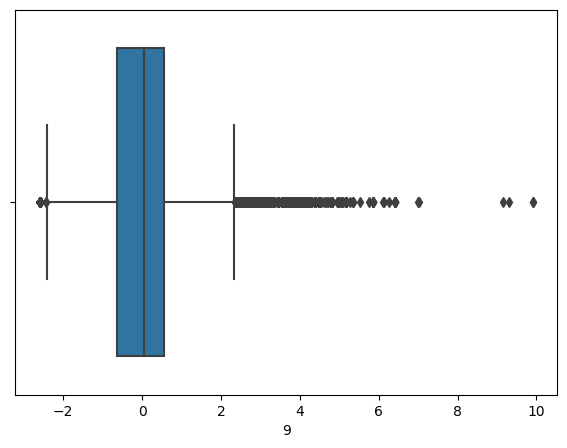

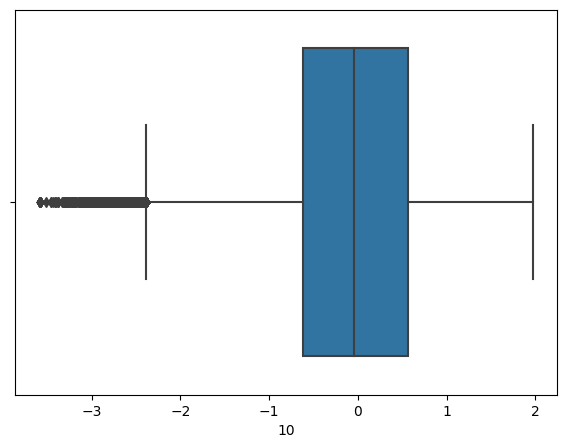

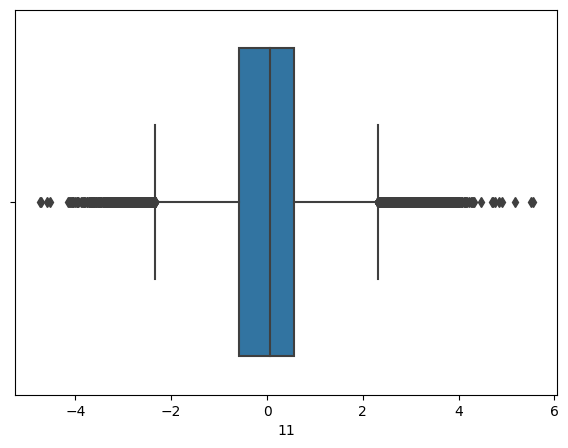

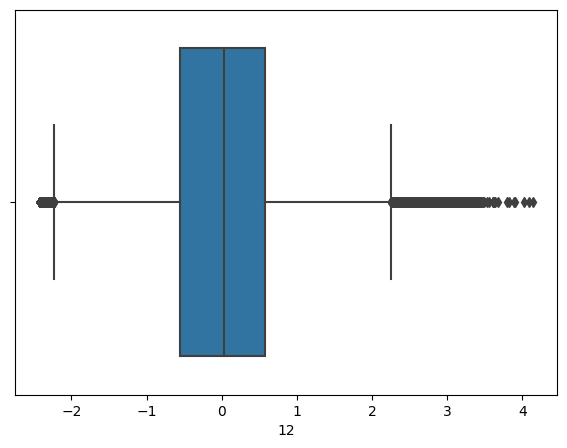

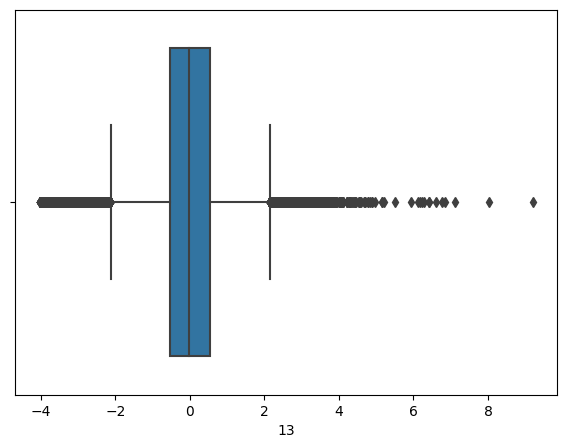

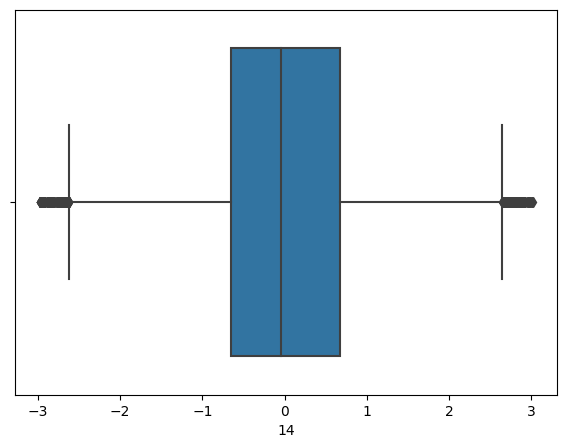

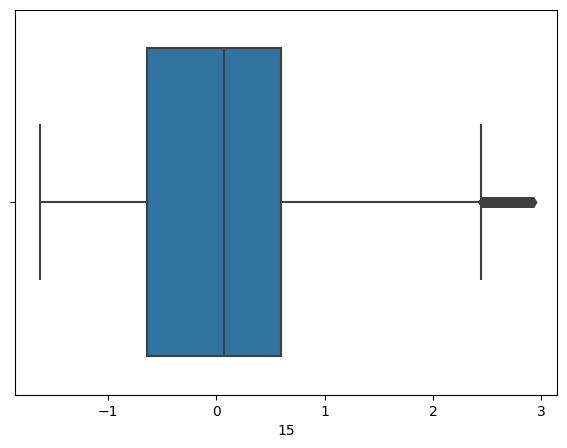

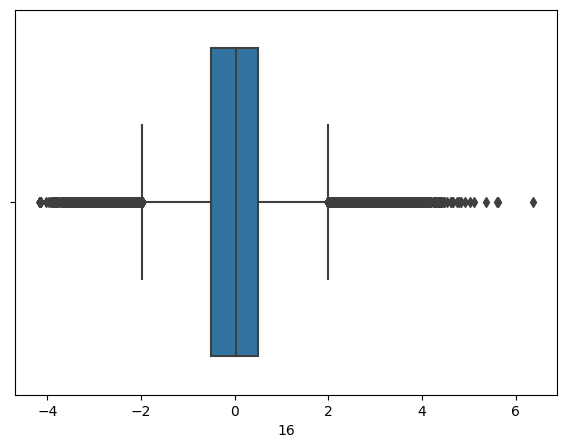

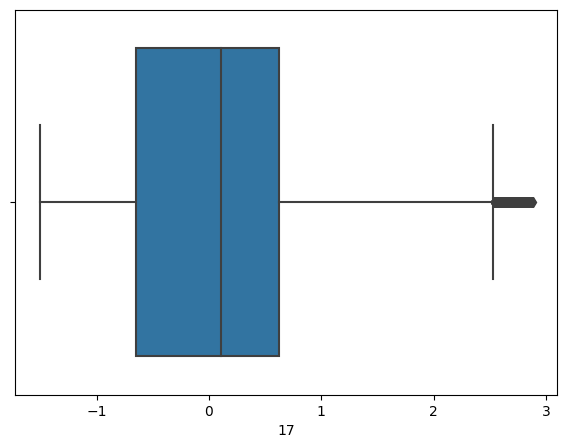

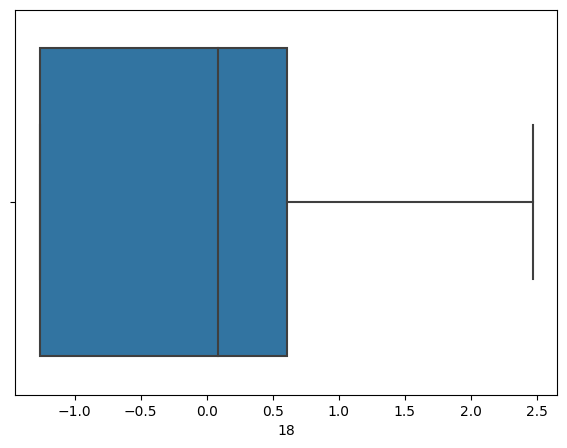

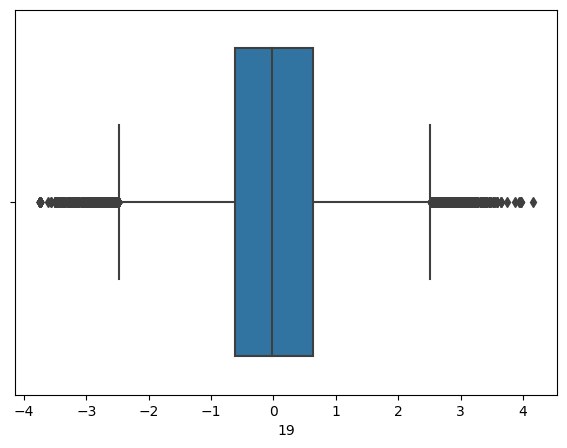

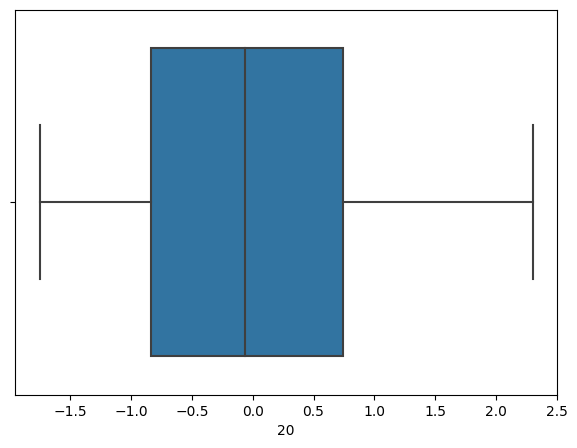

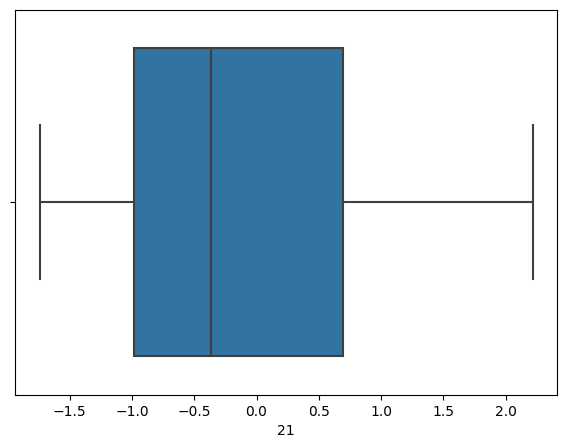

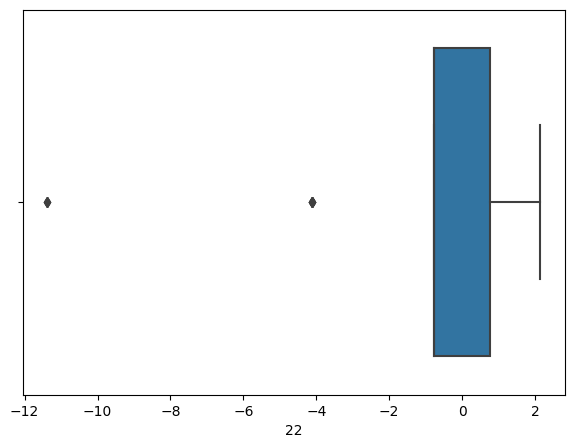

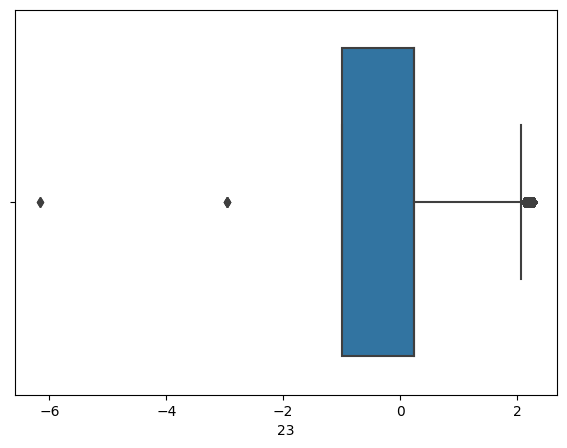

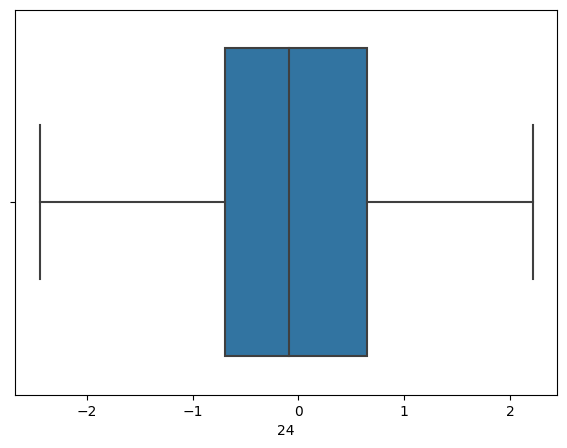

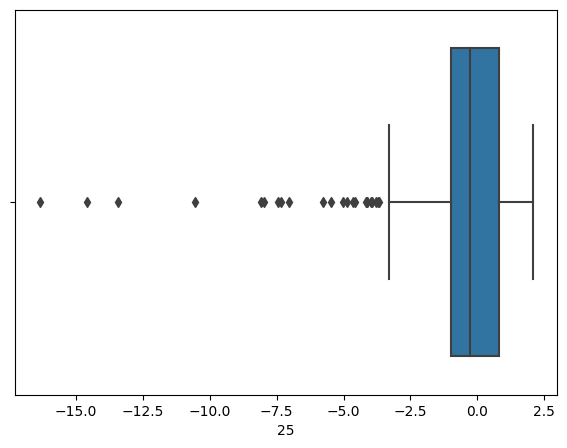

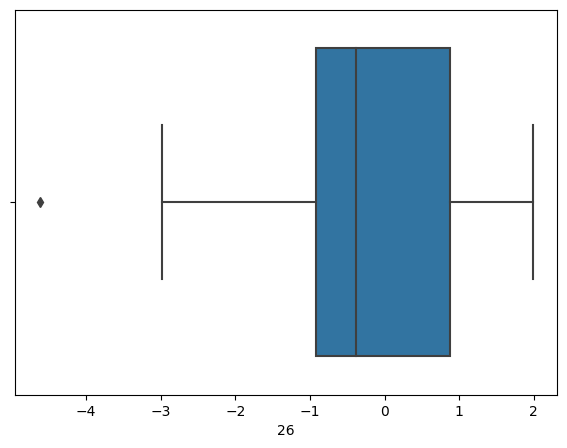

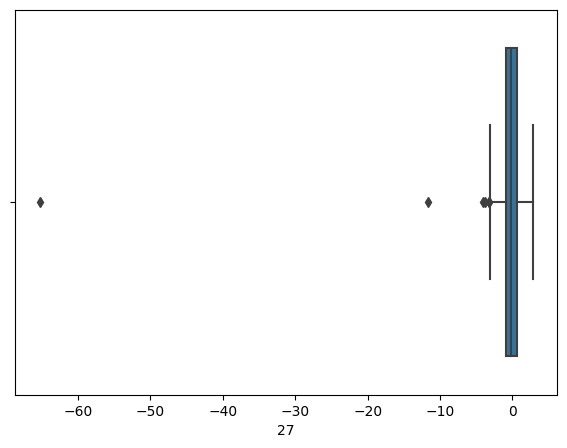

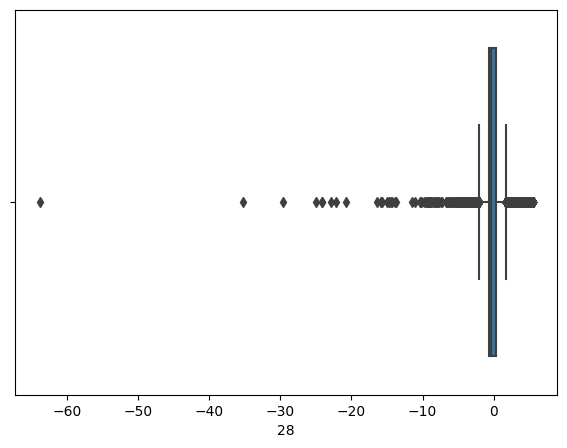

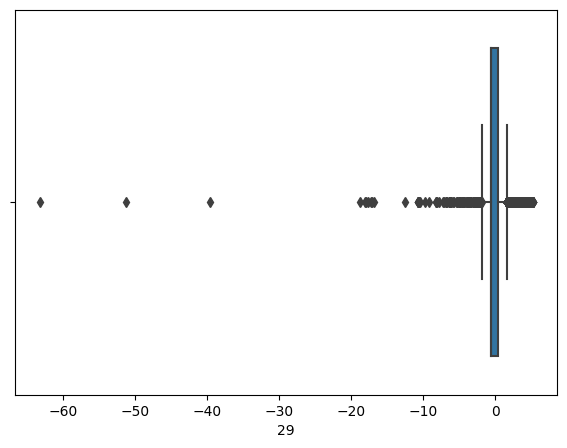

In [22]:
# Ploting again to check 

for col in X.columns:
    plots_box(X, col)

C:\Users\ketul\AppData\Local\Temp\ipykernel_11252\3085191047.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


<Figure size 700x500 with 0 Axes>

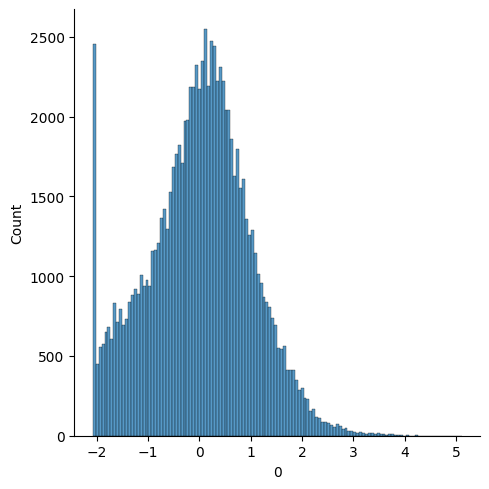

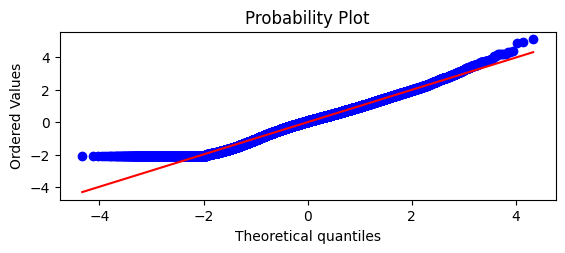

<Figure size 700x500 with 0 Axes>

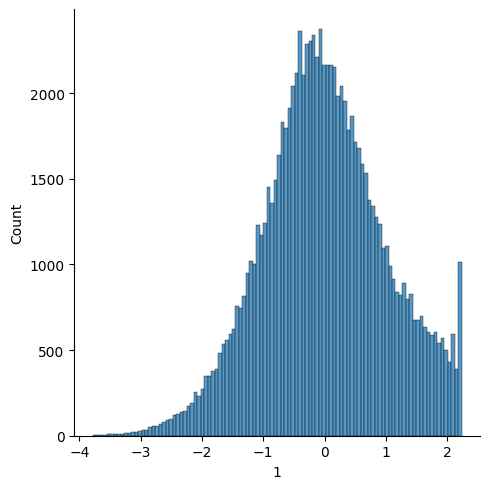

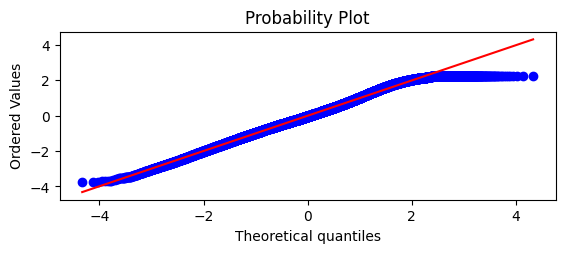

<Figure size 700x500 with 0 Axes>

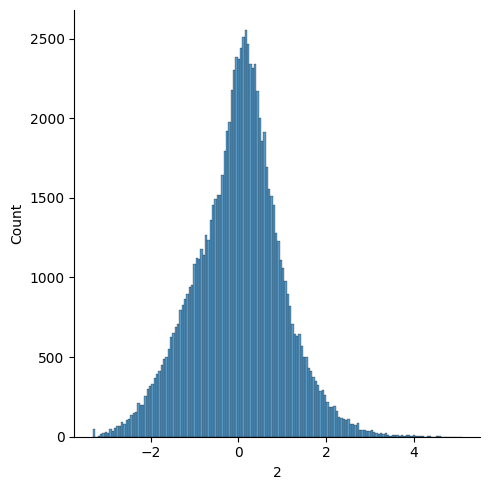

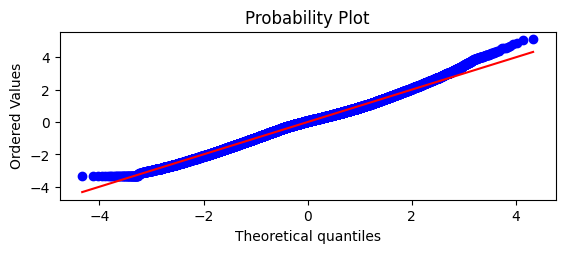

<Figure size 700x500 with 0 Axes>

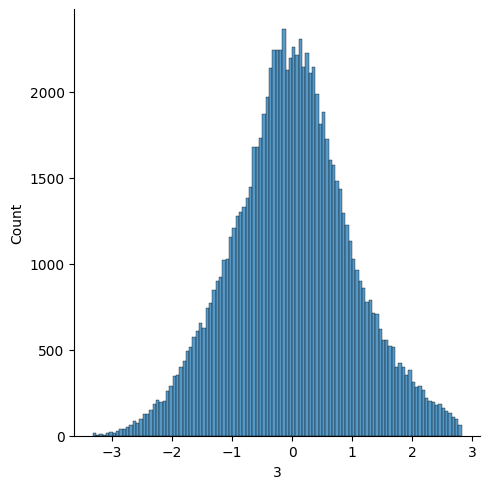

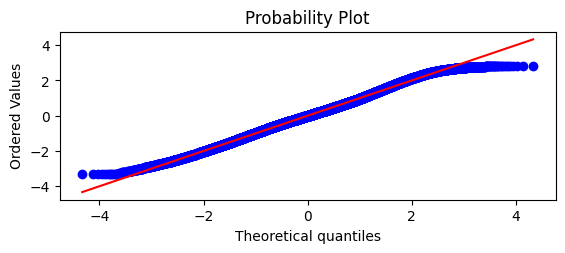

<Figure size 700x500 with 0 Axes>

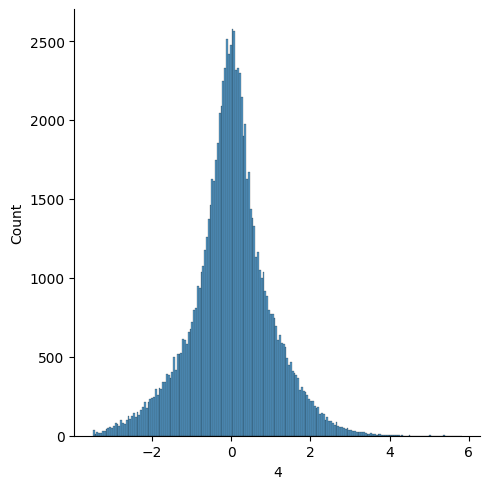

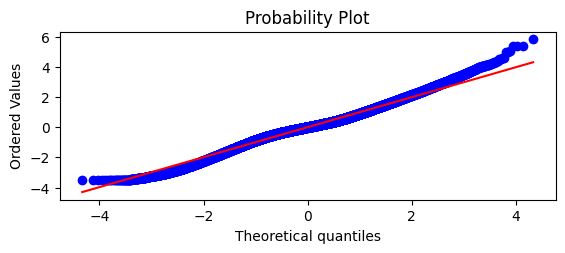

<Figure size 700x500 with 0 Axes>

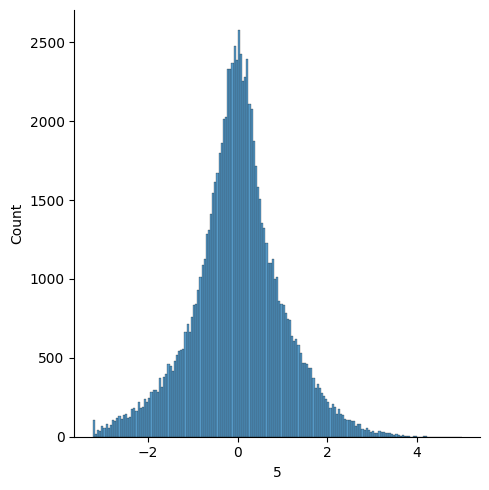

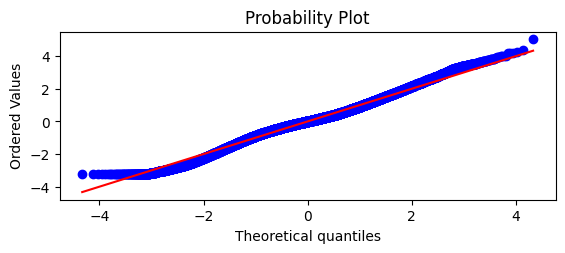

<Figure size 700x500 with 0 Axes>

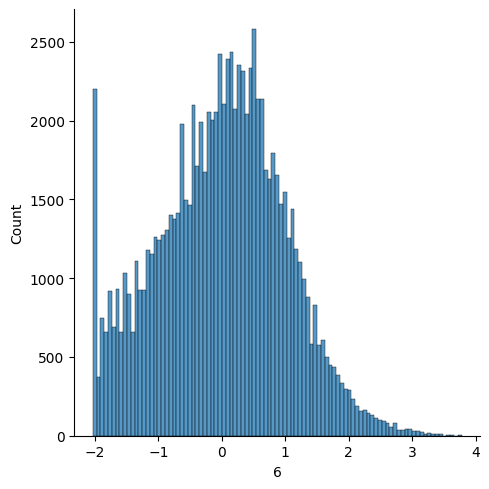

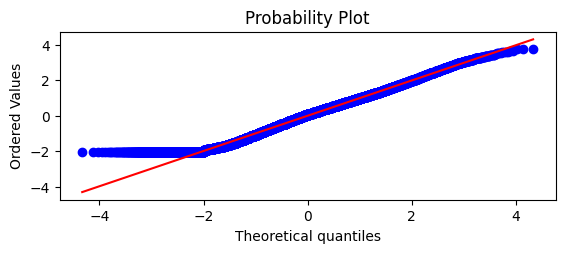

<Figure size 700x500 with 0 Axes>

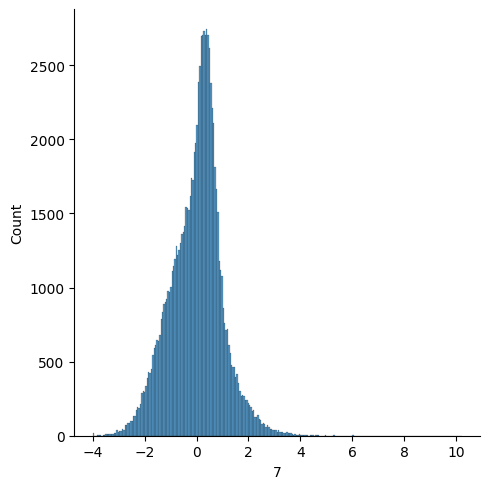

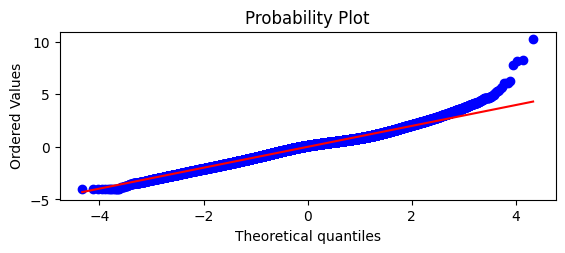

<Figure size 700x500 with 0 Axes>

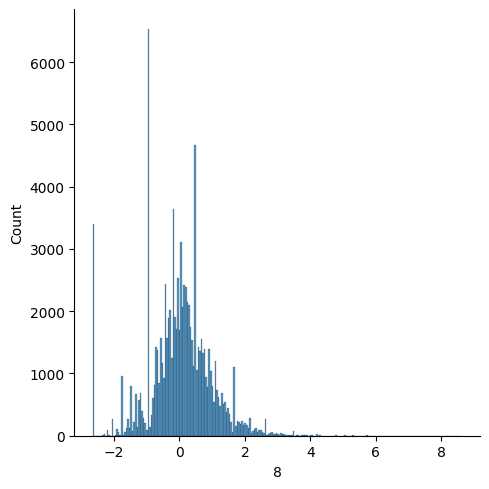

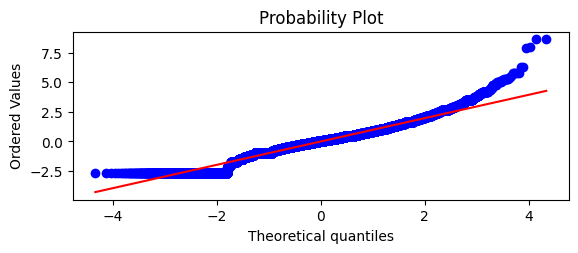

<Figure size 700x500 with 0 Axes>

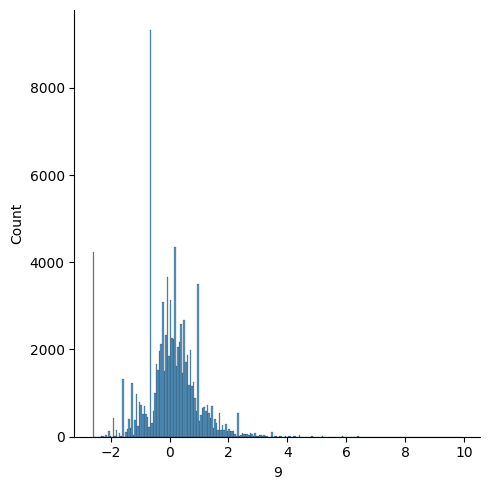

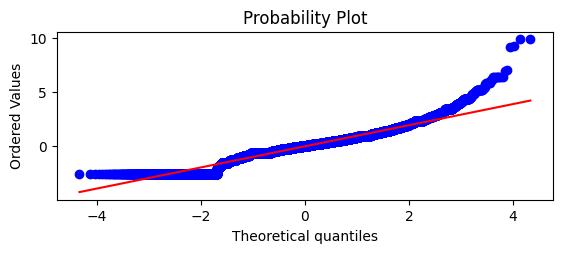

<Figure size 700x500 with 0 Axes>

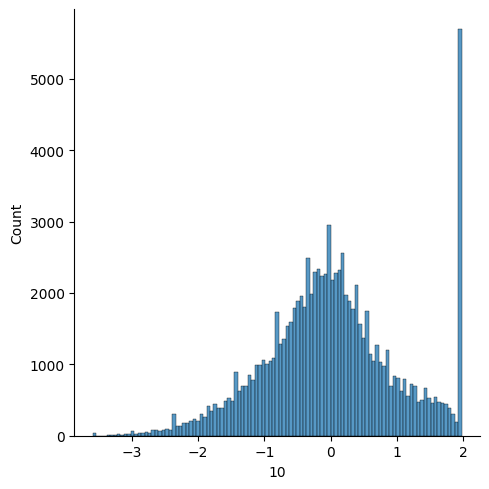

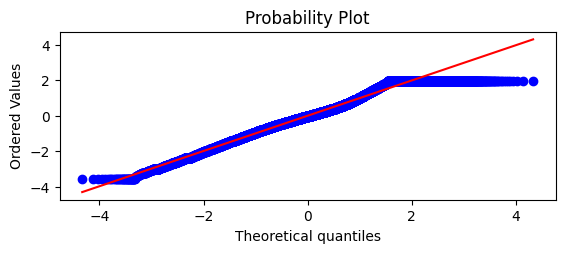

<Figure size 700x500 with 0 Axes>

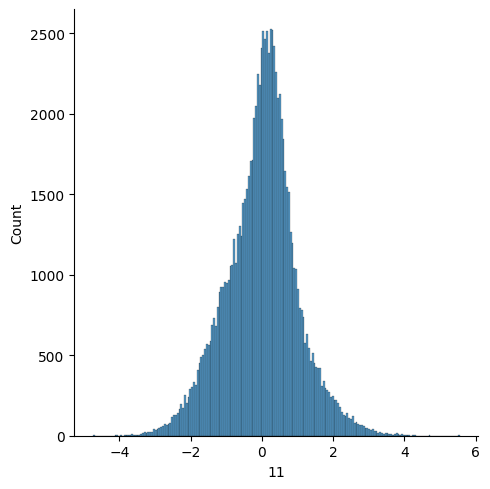

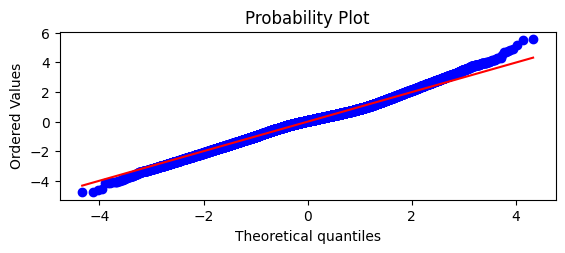

<Figure size 700x500 with 0 Axes>

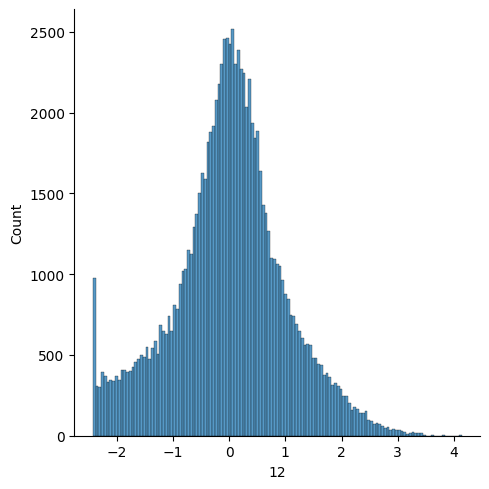

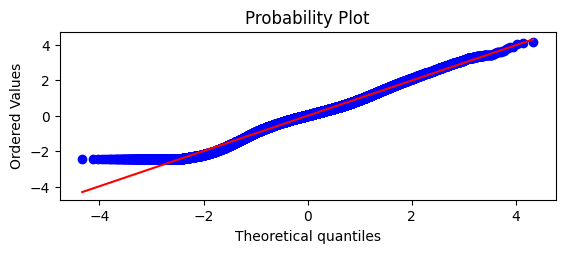

<Figure size 700x500 with 0 Axes>

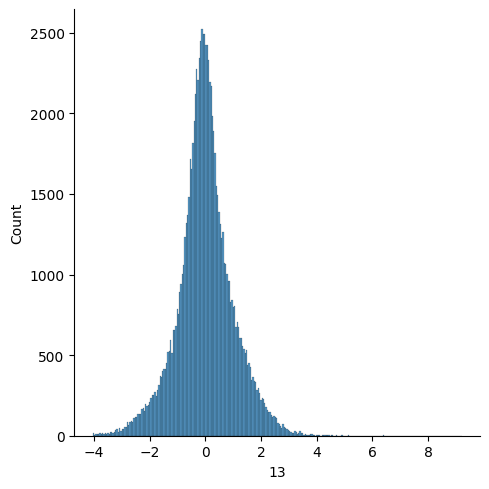

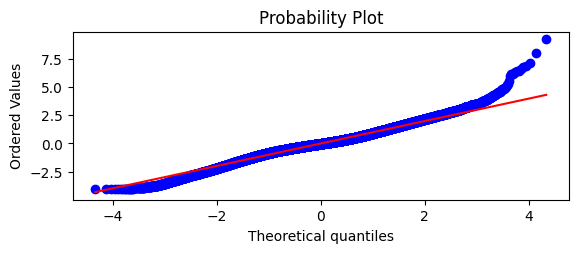

<Figure size 700x500 with 0 Axes>

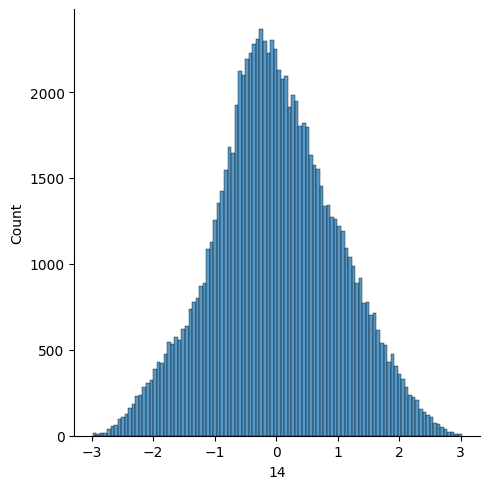

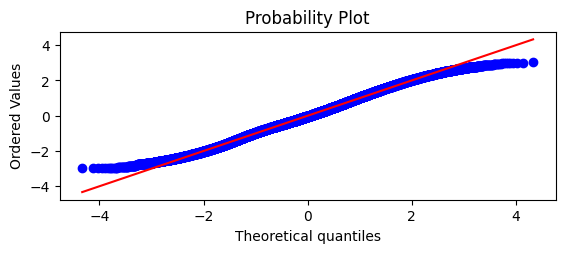

<Figure size 700x500 with 0 Axes>

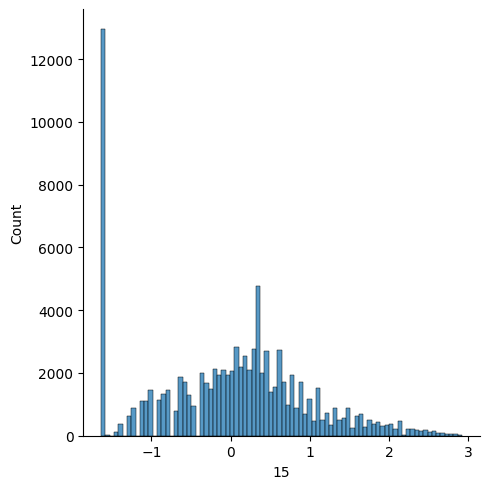

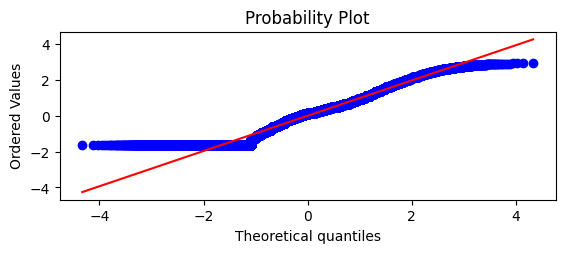

<Figure size 700x500 with 0 Axes>

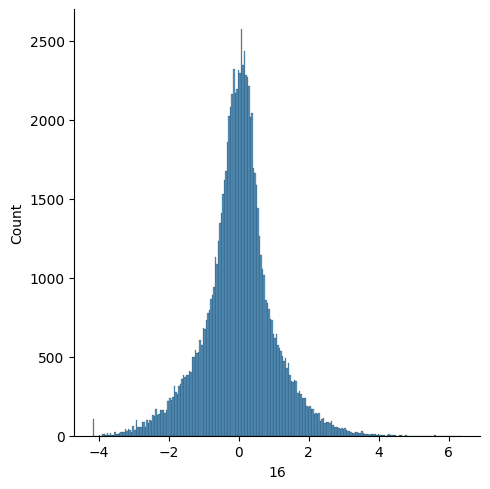

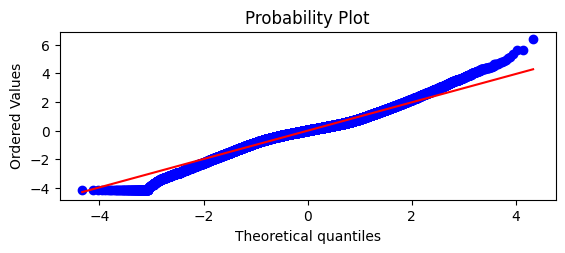

<Figure size 700x500 with 0 Axes>

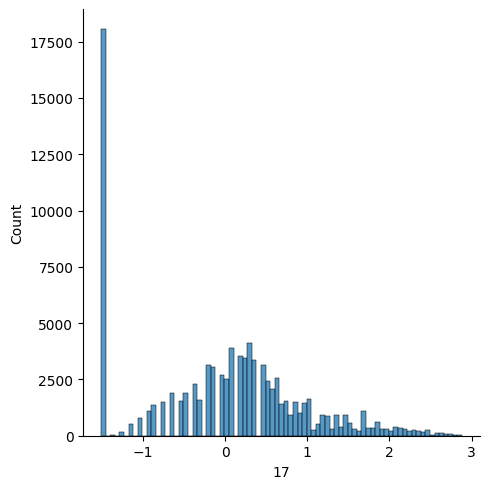

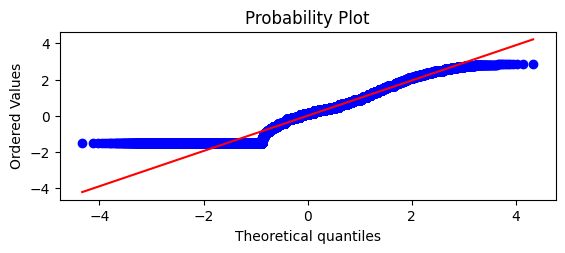

<Figure size 700x500 with 0 Axes>

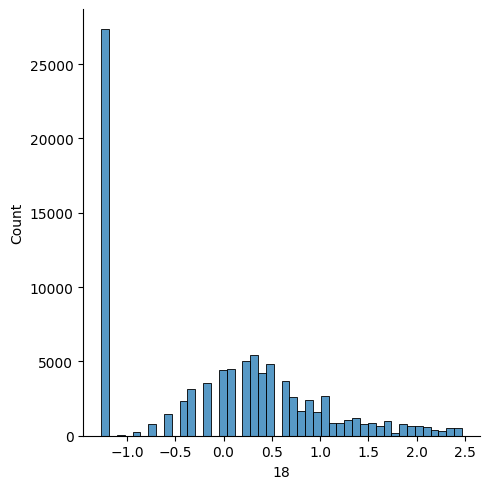

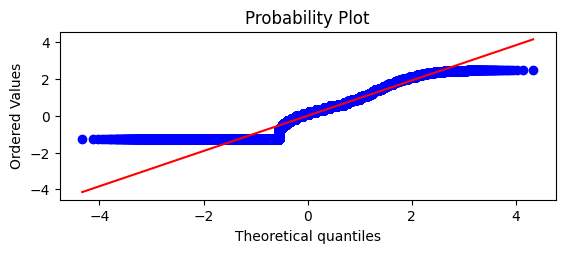

<Figure size 700x500 with 0 Axes>

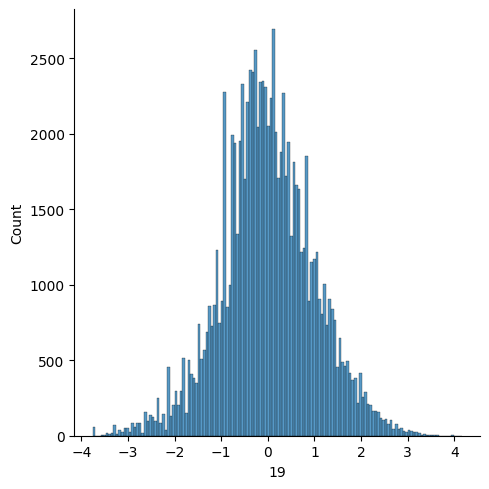

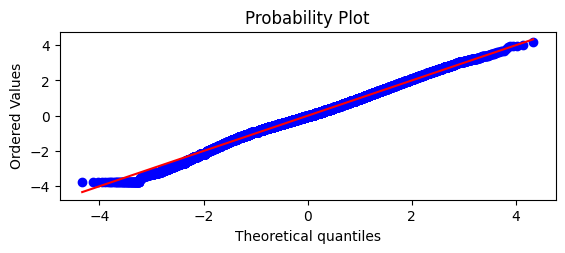

<Figure size 700x500 with 0 Axes>

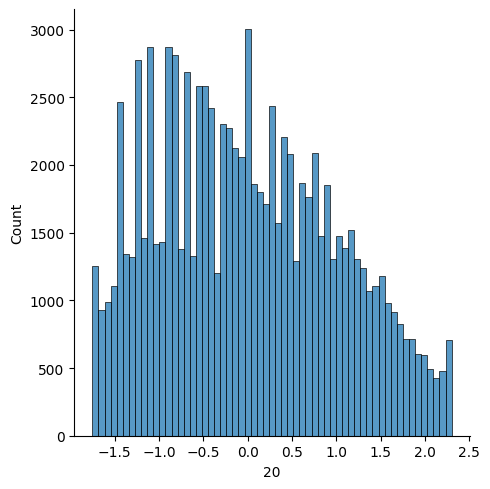

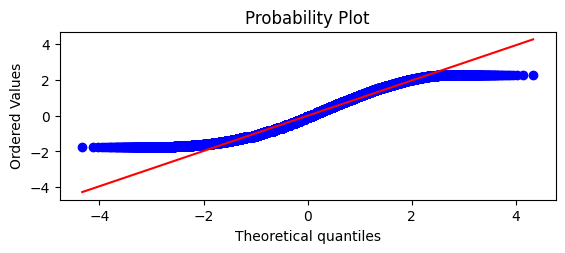

<Figure size 700x500 with 0 Axes>

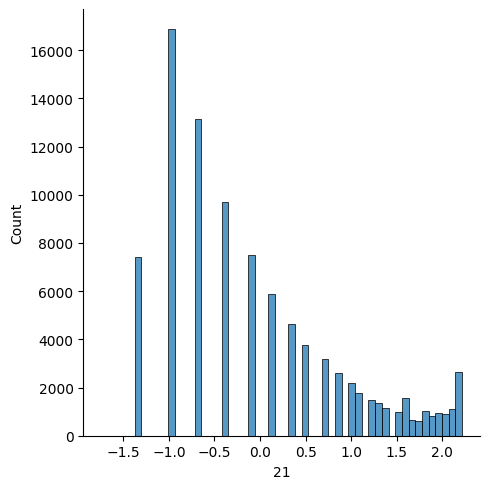

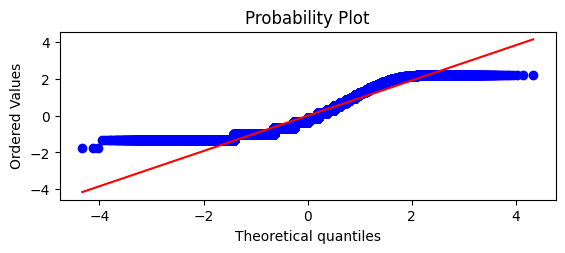

<Figure size 700x500 with 0 Axes>

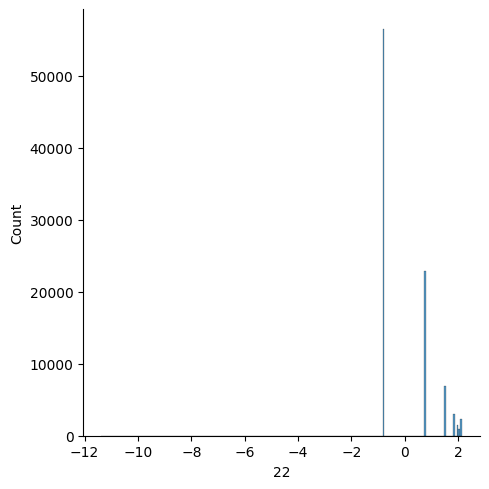

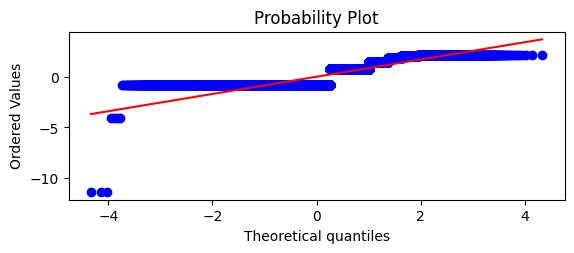

<Figure size 700x500 with 0 Axes>

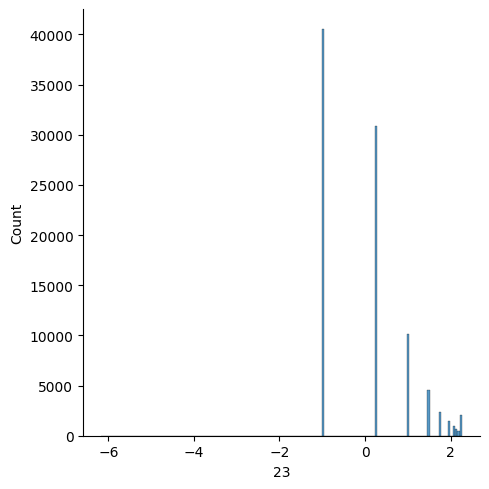

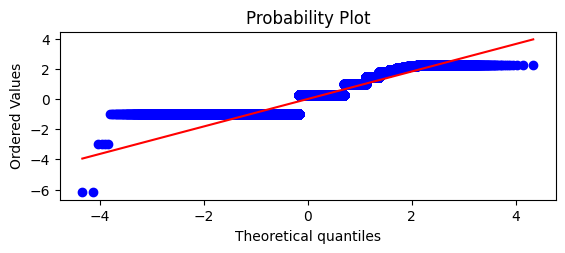

<Figure size 700x500 with 0 Axes>

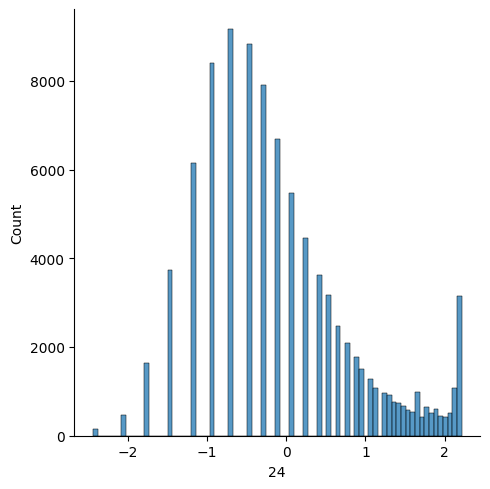

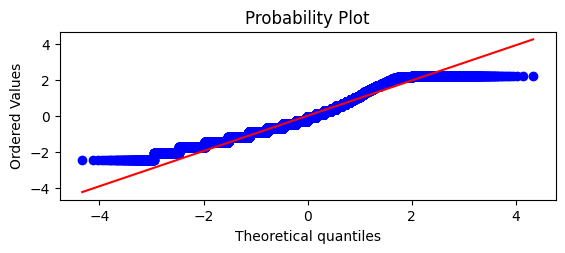

<Figure size 700x500 with 0 Axes>

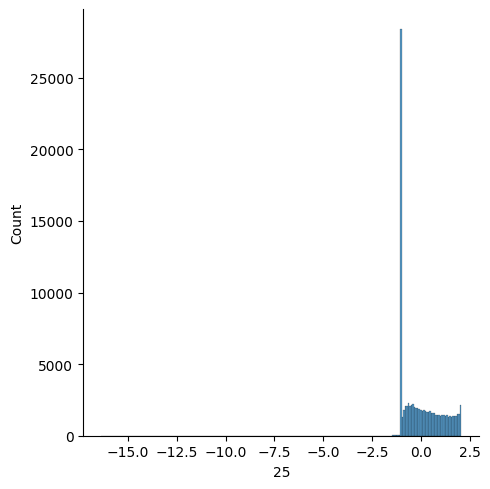

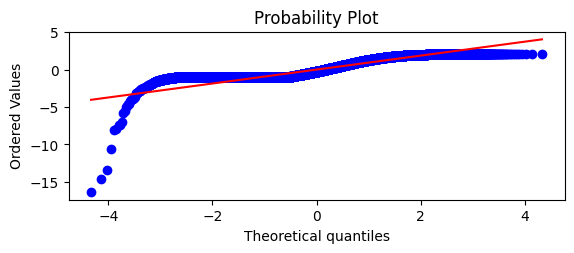

<Figure size 700x500 with 0 Axes>

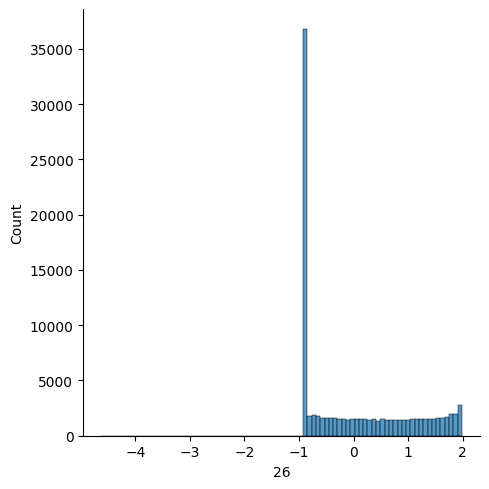

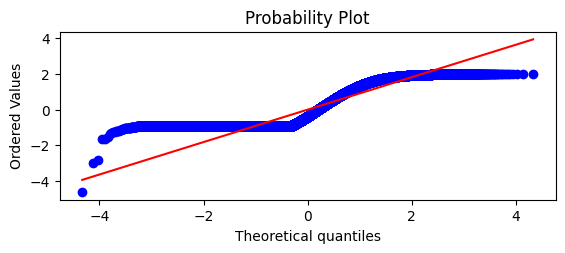

<Figure size 700x500 with 0 Axes>

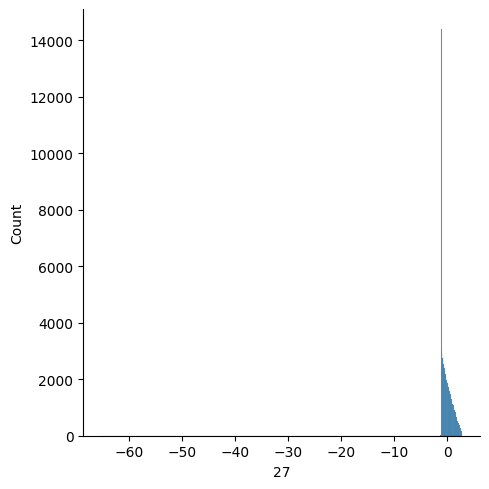

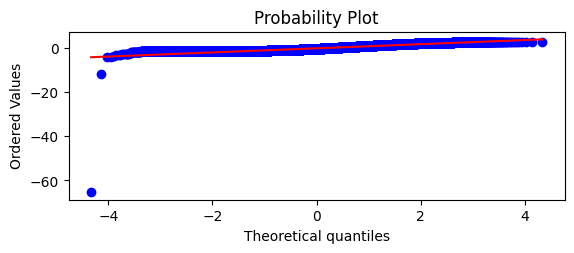

<Figure size 700x500 with 0 Axes>

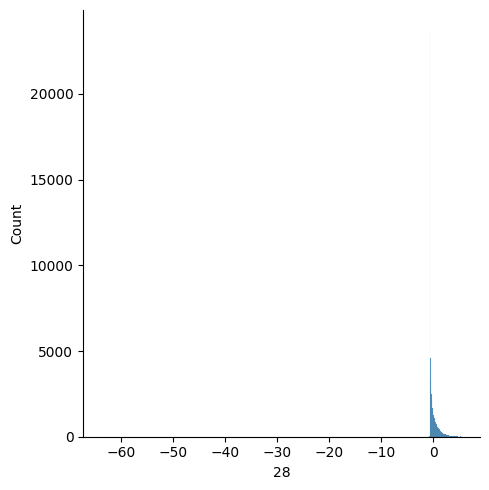

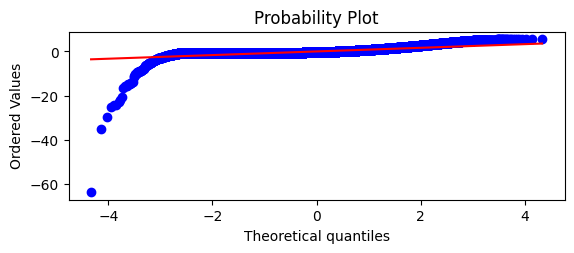

<Figure size 700x500 with 0 Axes>

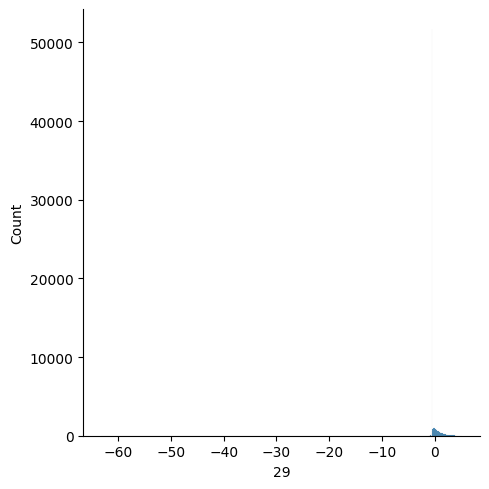

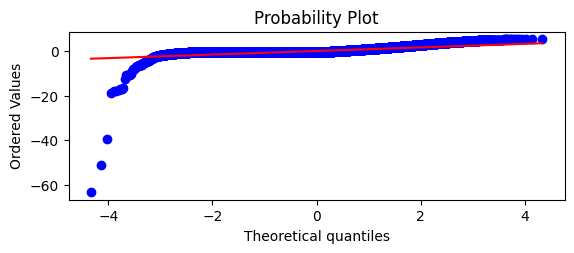

In [23]:
# Ploting again to check

for col in X.columns:
    plots_hist(X, col)
    plot_prob(X, col)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(75199, 30)
(75199,)
(18800, 30)
(18800,)


In [26]:
# Importing validation data

val = pd.read_csv("data_val.csv")

I am going to follow the same scaling and tranformation for validation set also 

In [27]:
# Assinging independent and dependent variables as X_val and y_val for the model evaluation

X_val = val.drop('default', axis = 1)
y_val = val['default']

In [28]:
# Scaling the data using MinMaxScaler which scale the data from 0 to 1 

scaler = MinMaxScaler()
scaler.fit(X_val)
X_val = scaler.transform(X_val)

In [29]:
# Tranforming the data using Yeo-Johnson transformer

tranformer = PowerTransformer(method = 'yeo-johnson')
X_val = tranformer.fit_transform(X_val)
X_val

array([[ 1.37156254, -0.88942879, -1.49122917, ...,  0.94389862,
        -0.27257596, -0.65243063],
       [ 0.50506503,  0.29019326, -0.53526521, ...,  0.05826758,
         0.52102987,  0.06043605],
       [ 1.62866301, -1.86358504, -0.88172637, ...,  0.42891311,
        -0.46319658, -0.65243063],
       ...,
       [ 1.96404682, -0.99458113, -0.48719858, ..., -0.97282067,
        -0.44290963, -0.65243063],
       [ 0.58542011, -0.66891358, -1.64619982, ..., -1.00474684,
        -0.42541195, -0.36809277],
       [ 1.01826519, -0.10046281, -1.61072843, ...,  0.44775125,
         1.65447171, -0.65243063]])

### Results of EDA and Data Transformation

- Firstly, the dataset does not have any null values, but our dataset did have 1 duplication row which we dropped.
- Secondly, we found all the features in our dataset are highly skewed and contain outliers. Which was handled using Yeo-Johnson transformation.
- Thirdly, we found target variable has imbalanced classes, to handle this we will us StratifiedKFold cross validation technique during model training. 

## Model Building and Optimizing 

### Logistic Regression

In [30]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [32]:
# Here I am using GridSearchCV to find the best hyperparameter for the model 
from sklearn.linear_model import LogisticRegression

# Create a based model
log_c = LogisticRegression(class_weight='balanced')

# Inverse of regularization strength
param = {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20]}

# Instantiate the grid search model
# cv = cross-validation of 10
clf = GridSearchCV(log_c,param,scoring='roc_auc',refit=True,cv=10)
clf.fit(X_train, y_train)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_))

Best roc_auc: 0.8137, with best C: {'C': 0.01}


The best hyperparameters found is **C: {'C': 0.01}**

### Base Logistic Regression Model with C = 0.01

In [33]:
# Creating model based on the best hyperparameters found 

from sklearn.metrics import roc_auc_score, classification_report

clf = LogisticRegression(class_weight='balanced', C=0.01)
clf.fit(X_train, y_train)

y_hat_prob = [x[1] for x in clf.predict_proba(X_test)]

auc_prob = roc_auc_score(y_test, y_hat_prob)

y_pred = clf.predict(X_test)
print('AUC Class probability: ', auc_prob)

AUC Class probability:  0.8135382003772857


In [34]:
# Downloading class probability predictions 

y_hat_prob_df = pd.DataFrame(y_hat_prob)
y_hat_prob_df.to_csv('results1.csv',index=False, header = False)

In [37]:
X = X.values

Since our target label is unbalanced I am using StratifiedKFolds to find the best train and val sets

In [38]:
from sklearn.metrics import roc_auc_score, classification_report

In [39]:
cross_val_round = 1
print("Model evaluation\n")

for train_index, test_index in StratifiedKFold(10, shuffle=True).split(X,y):
    X_train_, X_test_ = X[train_index], X[test_index]
    y_train_, y_test_ = y.iloc[train_index], y.iloc[test_index]
    clf = LogisticRegression(class_weight='balanced', C=0.01)
    clf.fit(X_train_, y_train_)
    y_hat_prob = [x[1] for x in clf.predict_proba(X_test_)]
    auc_prob = roc_auc_score(y_test_, y_hat_prob)
    
    print('Round ' + str(cross_val_round) + " AUC Class probability: " + str(auc_prob))
    cross_val_round += 1

Model evaluation

Round 1 AUC Class probability: 0.8067227777777778
Round 2 AUC Class probability: 0.8212119444444446
Round 3 AUC Class probability: 0.814376111111111
Round 4 AUC Class probability: 0.8153744444444444
Round 5 AUC Class probability: 0.8210083333333332
Round 6 AUC Class probability: 0.8182744444444443
Round 7 AUC Class probability: 0.7937549999999999
Round 8 AUC Class probability: 0.8080358333333334
Round 9 AUC Class probability: 0.8236352777777778
Round 10 AUC Class probability: 0.8229425491721303


Fold round 10 tuned out to be the best performing model with **Round 10 AUC Class probability: 0.844515**

### Random Forest Classifier

In [40]:
# Preparing Data for random forest classifier

data_rf = data

In [41]:
# Droping the duplicates values 

data.drop_duplicates(inplace = True)

In [42]:
X_rf = data_rf.drop('default', axis = 1)
y_rf = data_rf['default']

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size = 0.2)

In [44]:
# # # Assinging independent and dependent variables for training and val set

# X_rf = data_rf.drop('default', axis = 1)
# y_rf = data_rf['default']

# X_val_rf = val_rf.drop('default', axis = 1)
# y_val_rf = val_rf['default']

### Base Random Forest Model

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Creating and traning model 
clf = RandomForestClassifier(criterion="gini", n_estimators=200)

clf.fit(X_train_rf, y_train_rf)

y_hat_prob_rf = [x[1] for x in clf.predict_proba(X_test_rf)]

In [49]:
# Model evaluation 
from sklearn.metrics import roc_auc_score

auc_prob_rf = roc_auc_score(y_test_rf, y_hat_prob_rf)

print('AUC Class probability: ', auc_prob_rf)

AUC Class probability:  0.8149132717212534


In [47]:
# Downloading class probability predictions 

y_hat_prob_df = pd.DataFrame(y_hat_prob)
y_hat_prob_df.to_csv('results2.csv',index=False, header = False)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num = 10)],
    'criterion' : ['gini', 'entropy'],
    'max_features' : ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10,110,num = 11)],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'bootstrap': [True]
    
}

# Create a based model
clf_rf = RandomForestClassifier()

# Instantiate the grid search model 
# cv = cross-validation of 3
grid_search = RandomizedSearchCV(estimator = clf_rf, param_distributions = param_grid,
                                 n_iter = 10, cv = 3,random_state=42, n_jobs=3, scoring='roc_auc',refit=True)

grid_search.fit(X_rf, y_rf)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf_rf.best_score_, clf_rf.best_params_))

Due to very high search space of 5 x 3 x 4 x 3 x 3 x 1 = 540 which takes a lot of time to find and due to time constrain I was not able to find the best hyperparameter for Random forest classifier 